## Explorasi data peraih medali dalam Tokyo Olimpics 2021

###### 1873012 - Gregorius Kennard Taruna

### Tokyo Olympics 2021 data

### Import libraries

Berikut mengimport libary yang dibutuhkan

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import plotly.express as px

# Athlete Dataset Analysis

## Read the dataset from xlsx

Berikut memuat dataset athlete untuk mencari informasi data atlet yang dibutuhkan

In [2]:
athletes_df = pd.read_excel("Athletes.xlsx")

Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [3]:
athletes_df

Name      NOC           Discipline
0            AALERUD Katrine   Norway         Cycling Road
1                ABAD Nestor    Spain  Artistic Gymnastics
2          ABAGNALE Giovanni    Italy               Rowing
3             ABALDE Alberto    Spain           Basketball
4              ABALDE Tamara    Spain           Basketball
...                      ...      ...                  ...
11080  ZWICKER Martin Detlef  Germany               Hockey
11081      ZWOLINSKA Klaudia   Poland         Canoe Slalom
11082           ZYKOVA Yulia      ROC             Shooting
11083      ZYUZINA Ekaterina      ROC              Sailing
11084        ZYZANSKA Sylwia   Poland              Archery

[11085 rows x 3 columns]

### Information about the dataset

Berikut memanggil fungsi .info() untuk menampilkan informasi detail tentang dataframe.

In [4]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


Dapat dilihat informasi di atas menunjukkan bahwa terdapat 11085 baris dan 3 kolom yang berisi nama atlet (Name), negara (NOC) dan cabang olahraga (Discipline). Dari ketiga kolom data di atas bertipe object.

Berikut memanggil fungsi .nunique() untuk menghitung jumlah nilai unik di setiap kolom.

In [5]:
athletes_df.nunique()

Name          11062
NOC             206
Discipline       46
dtype: int64

dari data di atas terlihat dengan 11.602 nama, 206 negara, dan 46 cabang olahraga.

### Atlet yang unik

Dari informasi di atas diketahui bahwa terdapat 11062 nama yang unik dari 11085. Ini memungkinkan dari mereka ada yang berpartisipasi lebih dari satu cabang olahraga dan lebih dari satu kebangsaan.

Berikut menghitung atlet yang berpartisipasi lebih dari satu cabang olahraga, dan lebih dari satu kebangsaan.

In [6]:
atlet = athletes_df.groupby('Name')['NOC','Discipline'].nunique()

kewarganegaraan = atlet['NOC'] == 1
kewarganegaraan1 = atlet['NOC'] > 1
kewarganegaraan2 = atlet['NOC'] > 2

cabang_olahraga = atlet['Discipline'] == 1
cabang_olahraga1 = atlet['Discipline'] > 1
cabang_olahraga2 = atlet['Discipline'] > 2

<ipython-input-6-8523b3afe8ba>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  atlet = athletes_df.groupby('Name')['NOC','Discipline'].nunique()


In [7]:
print(f'Jumlah atlet dengan satu kewarganegaraan adalah: {atlet[kewarganegaraan].shape[0]} atlet')
print(f'Jumlah atlet dengan dua kewarganegaraan adalah: {atlet[kewarganegaraan1].shape[0]} atlet')
print(f'Jumlah atlet yang kewarganegaraan lebih dari dua adalah: {atlet[kewarganegaraan2].shape[0]} atlet')

Jumlah atlet dengan satu kewarganegaraan adalah: 11053 atlet
Jumlah atlet dengan dua kewarganegaraan adalah: 9 atlet
Jumlah atlet yang kewarganegaraan lebih dari dua adalah: 0 atlet


In [8]:
print(f'Atlet yang bertanding dalam satu cabang olahraga adalah: {atlet[cabang_olahraga].shape[0]} atlet')
print(f'Atlet yang bertanding dalam dua cabang olahraga adalah: {atlet[cabang_olahraga1].shape[0]} atlet')
print(f'Atlet yang bertanding lebih dari dua cabang olahraga adalah: {atlet[cabang_olahraga2].shape[0]} atlet')

Atlet yang bertanding dalam satu cabang olahraga adalah: 11041 atlet
Atlet yang bertanding dalam dua cabang olahraga adalah: 21 atlet
Atlet yang bertanding lebih dari dua cabang olahraga adalah: 0 atlet


Dari data di atas terlihat ada 9 atlet yang memiliki 2 kewarganegaraan dan 21 atlet mengikuti 2 cabang olahraga.

Berikut nama atlet dari data di atas

Jumlah atlet dengan dua kewarganegaraan

In [9]:
atlet_2k = list(set(atlet[kewarganegaraan1].index))
idxs = np.where(athletes_df['Name'].apply(lambda x: x in atlet_2k))[0]
df_atlet_2k = athletes_df.iloc[idxs]
df_atlet_2k.set_index(['Name'],inplace=True)
df_atlet_2k

NOC           Discipline
Name                                                            
ALVAREZ Jorge                          Cuba             Shooting
ALVAREZ Jorge                      Honduras             Football
HALL James                    Great Britain  Artistic Gymnastics
HALL James         United States of America             Shooting
KURBANOV Ruslan                  Kazakhstan              Fencing
KURBANOV Ruslan                  Uzbekistan            Athletics
LI Qian          People's Republic of China               Boxing
LI Qian                              Poland         Table Tennis
MARTIN Daniel                       Ireland         Cycling Road
MARTIN Daniel                       Romania             Swimming
PEREZ Maria                     Puerto Rico                 Judo
PEREZ Maria                           Spain            Athletics
PEREZ Paola                         Ecuador            Athletics
PEREZ Paola                       Venezuela    Marathon Swimming
PORTELA Teresa                     Portugal         Canoe Sprint
PORTELA Teresa                        Spain         Canoe Sprint
WANG Yang        People's Republic of China              Sailing
WANG Yang                          Slovakia         Table Tennis

Atlet yang bertanding dalam dua cabang olahraga

In [10]:
atlet_2co = list(set(atlet[cabang_olahraga1].index))
idxs = np.where(athletes_df['Name'].apply(lambda x: x in atlet_2co))[0]
df_atlet_2k = athletes_df.iloc[idxs]
df_atlet_2k.set_index(['Name'],inplace=True)
df_atlet_2k

NOC           Discipline
Name                                                                  
ALVAREZ Jorge                                Cuba             Shooting
ALVAREZ Jorge                            Honduras             Football
CHEN Yang              People's Republic of China            Athletics
CHEN Yang              People's Republic of China               Hockey
DYGERT Chloe             United States of America         Cycling Road
DYGERT Chloe             United States of America        Cycling Track
GANNA Filippo                               Italy         Cycling Road
GANNA Filippo                               Italy        Cycling Track
HALL James                          Great Britain  Artistic Gymnastics
HALL James               United States of America             Shooting
HAVIK Yoeri                           Netherlands         Cycling Road
HAVIK Yoeri                           Netherlands        Cycling Track
KIM Hyunsoo                     Republic of Korea    Baseball/Softball
KIM Hyunsoo                     Republic of Korea         Rugby Sevens
KOPECKY Lotte                             Belgium         Cycling Road
KOPECKY Lotte                             Belgium        Cycling Track
KOVACS Zsofia                             Hungary  Artistic Gymnastics
KOVACS Zsofia                             Hungary            Triathlon
KURBANOV Ruslan                        Kazakhstan              Fencing
KURBANOV Ruslan                        Uzbekistan            Athletics
LI Qian                People's Republic of China               Boxing
LI Qian                                    Poland         Table Tennis
MARTIN Daniel                             Ireland         Cycling Road
MARTIN Daniel                             Romania             Swimming
PALTRINIERI Gregorio                        Italy    Marathon Swimming
PALTRINIERI Gregorio                        Italy             Swimming
PEREZ Maria                           Puerto Rico                 Judo
PEREZ Maria                                 Spain            Athletics
PEREZ Paola                               Ecuador            Athletics
PEREZ Paola                             Venezuela    Marathon Swimming
SUN Jiajun             People's Republic of China         Cycling Road
SUN Jiajun             People's Republic of China             Swimming
van ROUWENDAAL Sharon                 Netherlands    Marathon Swimming
van ROUWENDAAL Sharon                 Netherlands             Swimming
WANG Yang              People's Republic of China              Sailing
WANG Yang                                Slovakia         Table Tennis
WATANABE Yuta                               Japan            Badminton
WATANABE Yuta                               Japan           Basketball
WELLBROCK Florian                         Germany    Marathon Swimming
WELLBROCK Florian                         Germany             Swimming
ZHANG Xin              People's Republic of China             Football
ZHANG Xin              People's Republic of China        Skateboarding

### Partisipasi atlet secara keseluruhan

Berikut visualisasi pie chart dalam menghitung jumlah atlet berdasarkan negara.

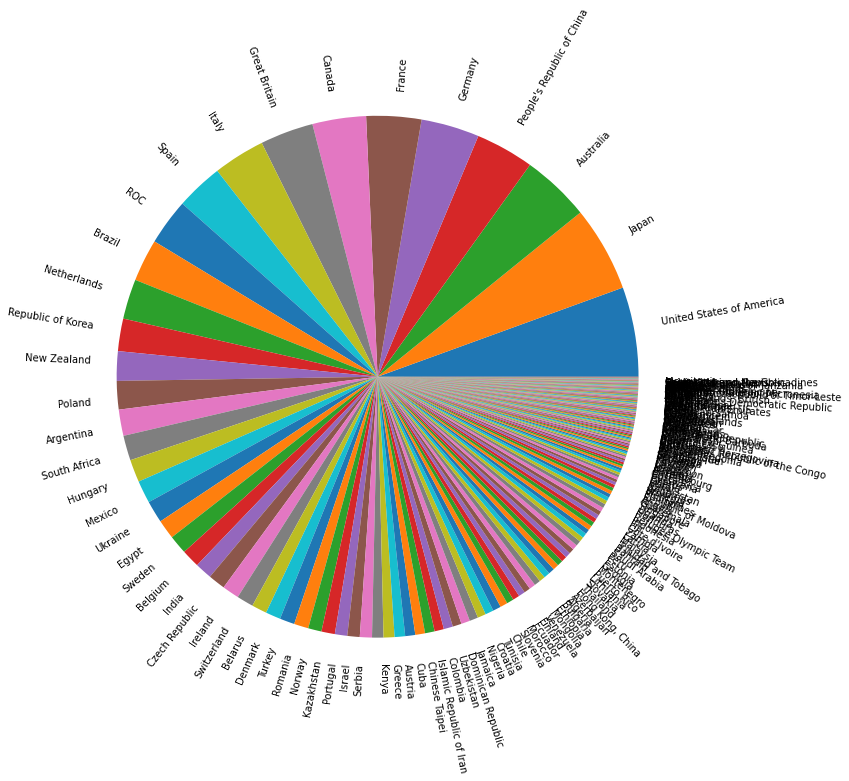

In [11]:
jumlah_athlete = athletes_df.groupby('NOC').size()
jumlah_athlete = jumlah_athlete.to_frame('Count') 
jumlah_athlete = jumlah_athlete.sort_values('Count', ascending=False)

plt.pie(jumlah_athlete['Count'], labels=jumlah_athlete.index.values, radius=3, rotatelabels=90)
plt.show()

Gambar di atas merupakan visualisasi pie chart yang menampilkan seluruh jumlah atlet berdasarkan negaranya. Dalam gambar ini memang belum terlihat jelas data yang ditampilkan tetapi akan dieksplor lebih lanjut untuk memberikan informasi yang lebih mendetail.

### Jumlah Atlet Berdasarkan Setiap Negara

Berikut mencari jumlah atlet tertinggi sampai terendah berdasarkan setiap negara.

In [12]:
athletes_df.groupby('NOC')['Name'].count().sort_values(ascending=False).to_frame(name='Jumlah')

Jumlah
NOC                                  
United States of America          615
Japan                             586
Australia                         470
People's Republic of China        401
Germany                           400
...                               ...
South Sudan                         2
Central African Republic            2
Saint Kitts and Nevis               2
St Vincent and the Grenadines       2
Mauritania                          2

[206 rows x 1 columns]

Dari data di atas terlihat negara dengan jumlah atlet terbanyak dan juga negara dengan jumlah atlet terendah.

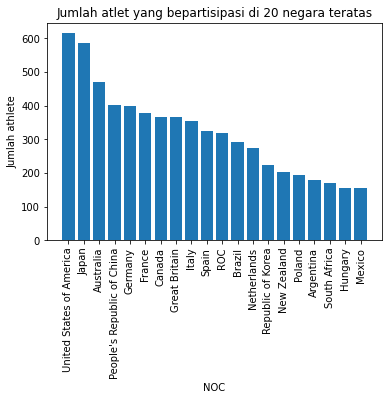

In [13]:
jumlah_athlete_terbanyak = athletes_df.groupby('NOC').size()
jumlah_athlete_terbanyak = jumlah_athlete_terbanyak.to_frame('Count') 
jumlah_athlete_terbanyak = jumlah_athlete_terbanyak.sort_values('Count', ascending=False).head(20)

plt.bar(jumlah_athlete_terbanyak.index.values, jumlah_athlete_terbanyak['Count'])
plt.title('Jumlah atlet yang bepartisipasi di 20 negara teratas')
plt.xlabel('NOC')
plt.ylabel('Jumlah athlete')
plt.xticks(rotation=90)
plt.show()

Negara dengan jumlah partisipasi atlet terbanyak yaitu berasal dari Amerika dengan jumlah 615 atlet.

### Negara dengan atlet terendah

Berikut menghitung jumlah atlet terendah yang divisualisasikan dengan bar chart.

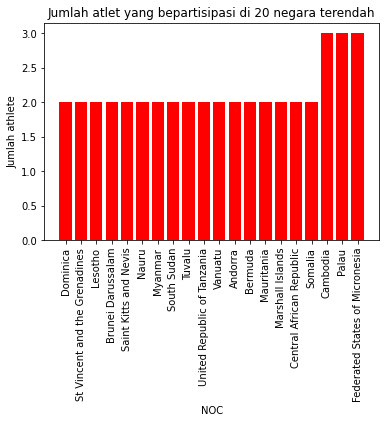

In [14]:
jumlah_athlete_terendah = athletes_df.groupby('NOC').size()
jumlah_athlete_terendah = jumlah_athlete_terendah.to_frame('Count') 
jumlah_athlete_terendah = jumlah_athlete_terendah.sort_values('Count').head(20)

plt.bar(jumlah_athlete_terendah.index.values, jumlah_athlete_terendah['Count'], color='red')
plt.title('Jumlah atlet yang bepartisipasi di 20 negara terendah')
plt.xlabel('NOC')
plt.ylabel('Jumlah athlete')
plt.xticks(rotation=90)
plt.show()

Dari data di atas terlihat bahwa terdapat 17 negara dengan jumlah atlet terendah. Salah satu negara dengan jumlah partisipasi atlet terendah yaitu berasal dari Dominica dengan jumlah 2 atlet.

# Gender Dataset Analysis

Berikut memuat dataset gender untuk mencari informasi data atlet yang dibutuhkan

### Read the dataset from xlsx

In [15]:
entriesGender_df = pd.read_excel("EntriesGender.xlsx")

Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [16]:
entriesGender_df.head(10)

Discipline  Female  Male  Total
0       3x3 Basketball      32    32     64
1              Archery      64    64    128
2  Artistic Gymnastics      98    98    196
3    Artistic Swimming     105     0    105
4            Athletics     969  1072   2041
5            Badminton      86    87    173
6    Baseball/Softball      90   144    234
7           Basketball     144   144    288
8     Beach Volleyball      48    48     96
9               Boxing     102   187    289

### Information about the dataset

Berikut memanggil fungsi .info() untuk menampilkan informasi detail tentang dataframe.

In [17]:
entriesGender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


data di atas menunjukkan bahwa terdapat 46 baris dan 4 kolom yang berisi Discipline, Female, Male, dan Total. Dari data di atas discipline merupakan data bertipe object sedangkan yang lainnya bertipe int.

### Perbandingan jumlah gender antara pria dan wanita

Berikut adalah bentuk visualisasi pie chart yang berisi perbandingan gender.

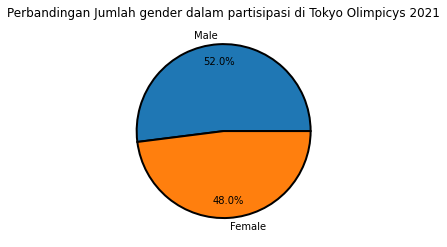

In [18]:
m = entriesGender_df['Male'].sum()
f = entriesGender_df['Female'].sum()
labl = ["Male","Female"]
total = [m,f]

plt.pie(total,
        labels=labl,
        autopct='%1.1f%%',
        pctdistance=0.80,
        wedgeprops={'edgecolor':'black', 'linewidth': '2'})
plt.title('Perbandingan Jumlah gender dalam partisipasi di Tokyo Olimpicys 2021')

fig = plt.gcf()

plt.show()

Dari visualiasi pie chart di atas terdapat bahwa partisipasi laki-laki lebih dominan dibandingkan perempuan yang hanya 48% saja. Dari diagram tersebut kita dapat mencari perbandingan gender dalam cabang olahraga.

### Cabang olahraga yang diminati pria dan wanita

Berikut analisa jumlah total partisipasi kedua gender dalam cabang olahraga.

In [19]:
total_gender_discipline = entriesGender_df.sort_values('Total', ascending=False).head(10)
total_gender_discipline.style.hide_columns(["Female", "Male"])

Berikut visualisasi bar chart dari analisa data di atas.

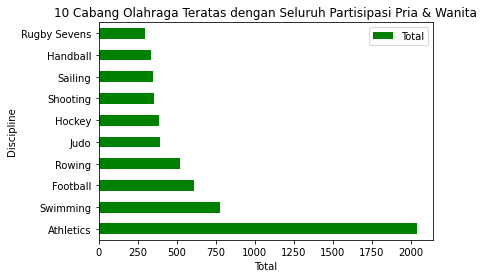

In [20]:
total_gender_discipline = entriesGender_df.sort_values('Total', ascending=False).head(10)
total_gender_discipline.plot(kind='barh', x='Discipline', y='Total', color='green')

plt.title('10 Cabang Olahraga Teratas dengan Seluruh Partisipasi Pria & Wanita')
plt.ylabel('Discipline')
plt.xlabel('Total')
plt.show()

Cabang olahraga yang diminati kedua gender yaitu athletics dengan jumlah 2041 atlet. Berikut dengan posisi kedua adalah swimming dengan jumlah 779 atlet dan posisi ketiga adalah football dengan jumlah 608 atlet. Selanjutnya akan menganalisa perbandingan partisipasi dalam cabang olahraga yang diminati pria dan wanita.

### Perbandingan partisipasi cabang olahraga yang diminati pria dan wanita

Berikut akan menganalisa perbandingan cabang olahraga yang diminati pria dan wanita.

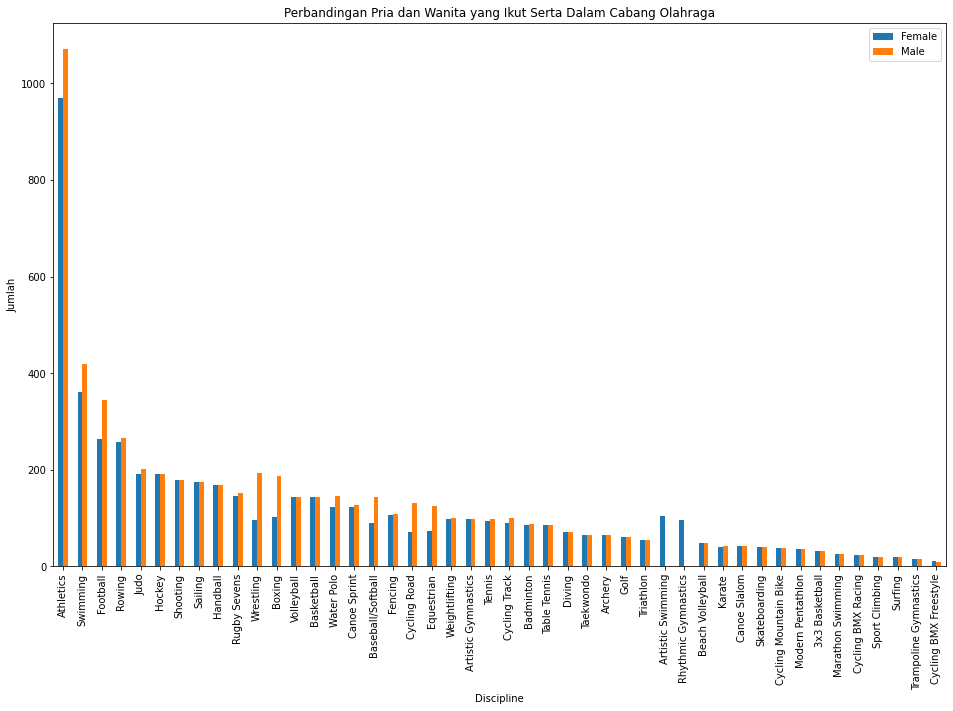

In [21]:
entriesGender_df.sort_values('Total', ascending=False).plot(x='Discipline',
           y=['Female', 'Male'],
           kind='bar', figsize=(16,10))

plt.title('Perbandingan Pria dan Wanita yang Ikut Serta Dalam Cabang Olahraga')
plt.ylabel('Jumlah')
plt.show()

Gambar di atas merupakan visualisasi perbandingan cabang olahraga yang diminati pria dan wanita. Terlihat bahwa partisipasi pria lebih tinggi dibandingkan dengan partisipasi perempuan. Pada bagian selanjutnya akan lebih manarik untuk mengeksplorasi lebih dalam lagi mengenai perbandingan gender dalam cabang olahraga.

### Perbandingan Gender dalam Cabang Olahraga

Berikut analisa perbandingan gender dalam cabang olahraga dalam visualisasi scatter plot.

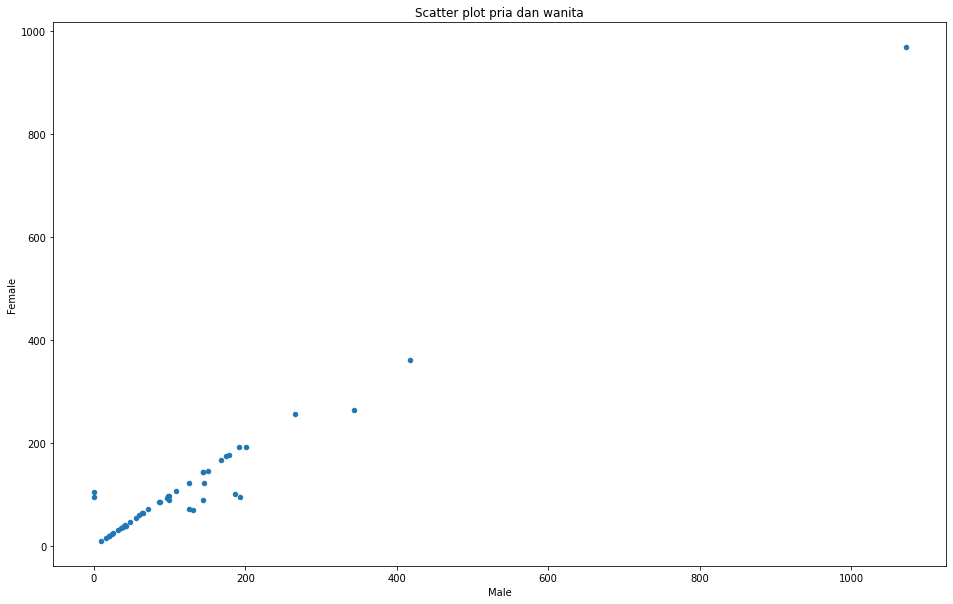

In [22]:
entriesGender_df.plot.scatter(x='Male',
                              y='Female', 
                              title='Scatter plot pria dan wanita', figsize=(16,10))
plt.show()

Dari gambar di atas terlihat bahwa sebagian besar partisipasi gender hampir seimbang dalam cabang olahraga. Selain itu terdapat satu cabang olahraga yang partisipasinya jauh berbeda dari yang lain dengan jumlah lebih dari 1000 pada pria dan kurang dari 1000 pada wanita. Selanjutnya terlihat juga terdapat partisipasi gender pria yang tepat berada di angka 0.

Berikut akan menganalisa cabang olahraga yang jumlahnya melebihi 1000 partisipasi.

In [23]:
Pria= entriesGender_df['Male']
Wanita = entriesGender_df['Female']
entriesGender_df.loc[Pria[Pria > 600].index]

Discipline  Female  Male  Total
4  Athletics     969  1072   2041

Dari data di atas terlihat bahwa cabang olahraga athletics memiliki jumlah partisipasi 1072 pria dan 969 wanita yang jika dijumlahkan totalnya 2041 partisipasi.

Berikut akan menganalisa cabang olahraga yang jumlah pria yaitu 0.

In [24]:
entriesGender_df.loc[Pria[Pria == 0].index]

Discipline  Female  Male  Total
3     Artistic Swimming     105     0    105
28  Rhythmic Gymnastics      96     0     96

Dari data di datas terlihat bahwa jumlah pastisipasi pria yang berjumlah 0 yaitu cabang olahraga Artistic Swimming & Rhythmic Gymnastics. Alasan kedua cabang olahraga itu tidak ada pria karena olahraga ini dibutuhkan badan yang fleksibel sehingga olahraga ini khusus untuk feminim.

# Coach Dataset Analysis

### Read the dataset from xlsx

Berikut memuat dataset coach untuk mencari informasi data pelatih yang dibutuhkan.

In [25]:
coaches_df = pd.read_excel("Coaches.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [26]:
coaches_df

Name                         NOC         Discipline  \
0           ABDELMAGID Wael                       Egypt           Football   
1                 ABE Junya                       Japan         Volleyball   
2             ABE Katsuhiko                       Japan         Basketball   
3              ADAMA Cherif               Côte d'Ivoire           Football   
4                AGEBA Yuya                       Japan         Volleyball   
..                      ...                         ...                ...   
389  ZAMORA PEDREIRA Javier                       Spain         Basketball   
390      ZAMPIERI Francesca               Liechtenstein  Artistic Swimming   
391          ZHANG Xiaohuan  People's Republic of China  Artistic Swimming   
392              ZIJP Simon                 Netherlands             Hockey   
393           ZONDI Nkuliso                South Africa             Hockey   

     Event  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
389    NaN  
390   Duet  
391    NaN  
392    NaN  
393  Women  

[394 rows x 4 columns]

### Information about the dataset

In [27]:
coaches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        394 non-null    object
 1   NOC         394 non-null    object
 2   Discipline  394 non-null    object
 3   Event       249 non-null    object
dtypes: object(4)
memory usage: 12.4+ KB


informasi di atas menunjukkan bahwa terdapat 394 baris dan 4 kolom yang berisi Name, NOC, Discipline, dan Event. Dari data di atas keempat kolom merupakan tipe data object.

### Negara dengan jumlah coach terbanyak

Berikut analisa menghitung jumlah coach terbanyak dalam setiap negara.

In [28]:
jumlah_coach_terbanyak = coaches_df.groupby('NOC').size()
jumlah_coach_terbanyak = jumlah_coach_terbanyak.to_frame('Count')
jumlah_coach_terbanyak = jumlah_coach_terbanyak.sort_values('Count', ascending=False).head(20)
jumlah_coach_terbanyak.head(20)

Count
NOC                              
Japan                          35
United States of America       28
Spain                          28
Australia                      22
Canada                         16
Italy                          14
ROC                            12
Egypt                          12
South Africa                   12
People's Republic of China     12
Argentina                      11
Netherlands                    10
France                         10
Venezuela                      10
Germany                         9
Nigeria                         9
New Zealand                     8
Mexico                          8
Brazil                          7
Republic of Korea               7

Berikut visualisasi bar chart dari jumlah coach terbanyak.

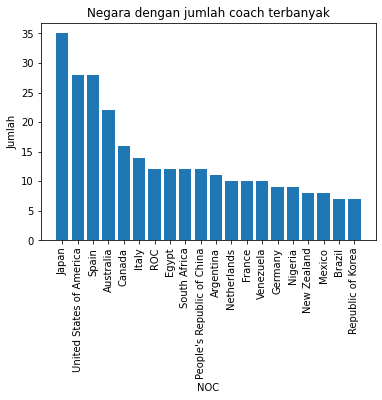

In [29]:
jumlah_coach_terbanyak = coaches_df.groupby('NOC').size()
jumlah_coach_terbanyak = jumlah_coach_terbanyak.to_frame('Count')
jumlah_coach_terbanyak = jumlah_coach_terbanyak.sort_values('Count', ascending=False).head(20)

plt.bar(jumlah_coach_terbanyak.index.values, jumlah_coach_terbanyak['Count'])
plt.title('Negara dengan jumlah coach terbanyak')
plt.xlabel('NOC')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

Dari data di atas terlihat bahwa Jepang memiliki coach terbanyak dengan jumlah 35 coach. Di posisi kedua adalah Amerika dengan jumlah 28 coach dan urutan ketiga yaitu Spanyol dengan jumlahcoach sama dengan Amerika yaitu 28 coach. Berikut akan mencari jumlah coach terendah.

### Negara dengan jumlah coach terendah

Berikut analisa menghitung jumlah coach terbanyak dalam setiap negara.

In [30]:
jumlah_coach_terendah = coaches_df.groupby('NOC').size()
jumlah_coach_terendah = jumlah_coach_terendah.to_frame('Count') 
jumlah_coach_terendah = jumlah_coach_terendah.sort_values('Count')
jumlah_coach_terendah.head(20)

Count
NOC                            
Angola                        1
Liechtenstein                 1
Croatia                       1
Portugal                      1
Belarus                       1
Cambodia                      1
Slovakia                      1
Tunisia                       1
Turkey                        1
Bahrain                       1
Honduras                      1
Saudi Arabia                  2
San Marino                    2
Islamic Republic of Iran      2
Romania                       2
Montenegro                    2
Kazakhstan                    2
Israel                        2
Zambia                        2
Fiji                          2

Berikut visualisasi bar chart dari jumlah coach terendah.

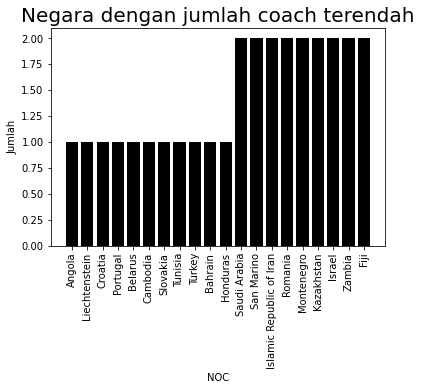

In [31]:
jumlah_coach_terendah = coaches_df.groupby('NOC').size()
jumlah_coach_terendah = jumlah_coach_terendah.to_frame('Count') 
jumlah_coach_terendah = jumlah_coach_terendah.sort_values('Count').head(20)

plt.bar(jumlah_coach_terendah.index.values, jumlah_coach_terendah['Count'], color='Black')
plt.title('Negara dengan jumlah coach terendah', fontsize=20)
plt.xlabel('NOC')
plt.ylabel('Jumlah')
plt.xticks(rotation=90)
plt.show()

Dari data di atas terlihat bahwa ada 11 negara dengan coach terendah dan salah satunya adalah negara Angola yang memiliki 1 coach. Sedang negara yang memiliki 2 coach contohnya adalah Saudi Arabia.

# Medals DataFrame Analysis

Berikut memuat dataset medals untuk mencari informasi data pelatih yang dibutuhkan 

### Read the dataset from xlsx

In [32]:
medals_df = pd.read_excel("Medals.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [33]:
medals_df

Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0      1    United States of America    39      41      33    113   
1      2  People's Republic of China    38      32      18     88   
2      3                       Japan    27      14      17     58   
3      4               Great Britain    22      21      22     65   
4      5                         ROC    20      28      23     71   
..   ...                         ...   ...     ...     ...    ...   
88    86                       Ghana     0       0       1      1   
89    86                     Grenada     0       0       1      1   
90    86                      Kuwait     0       0       1      1   
91    86         Republic of Moldova     0       0       1      1   
92    86        Syrian Arab Republic     0       0       1      1   

    Rank by Total  
0               1  
1               2  
2               5  
3               4  
4               3  
..            ...  
88             77  
89             77  
90             77  
91             77  
92             77  

[93 rows x 7 columns]

### Information about the dataset

Berikut memanggil fungsi .info() untuk menampilkan informasi detail tentang dataframe.

In [34]:
medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


informasi di atas menunjukkan bahwa terdapat 93 baris dan 7 kolom yang berisi Rank, Team/NOC, Gold, Silver, Bronze, Total, dan Rank by Total. Dari data di atas keenam kolom merupakan tipe data int seangkan kolom Team/NOC bertipe object.

### Medali Setiap Negara

Berikut visualisasi map yang berisi jumlah medali pada setiap negara.

In [35]:
px.choropleth(medals_df, locations="Team/NOC", 
                    locationmode='country names', 
                    color="Total", 
                    hover_name="Total", 
                    color_continuous_scale="turbo",
                    title='Medal setiap negara')

Dari map di atas negara dengan warna merah merupakan total medal yang paling banyak contohnya seperti negara Amerika sedangkan negara dengan warna biru tua merupakan total medal yang paling sedikit salah satu contohnya adalah Saudi Arabia.

### Perbandingan total medali

Berikut visualisasi bar chart pada perbandingan total medali gold, silver, dan bronze pada 10 negara.

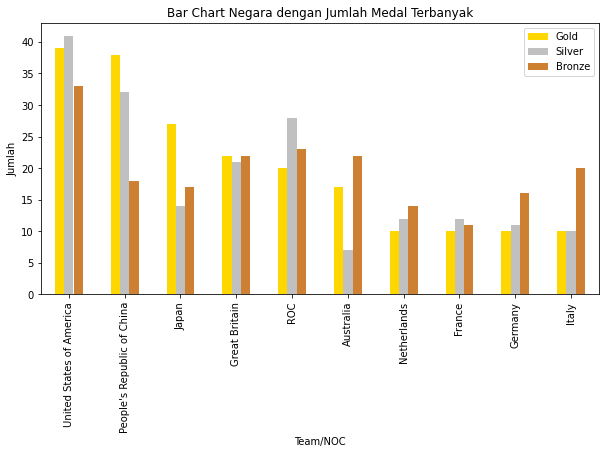

In [36]:
medals_df[:10].plot(x='Team/NOC',
           y=['Gold', 'Silver', 'Bronze'],
           color=['#FFD700', '#C0C0C0', '#CD7F32'],
           kind='bar', figsize=(10,5))

plt.title('Bar Chart Negara dengan Jumlah Medal Terbanyak')
plt.ylabel('Jumlah')
plt.show()

Data di atas terlihat Amerika mendapatkan medali paling banyak tetapi visualisasi di atas masih secara singkat menggambarkan medali yang diraih dari setiap negara dan akan dijelaskan lebih lanjut pada eksplorasi berikutnya.

### Negara dengan jumlah medali emas terbanyak

Berikut mencari jumlah medali gold yang diraih setiap negara teratas.

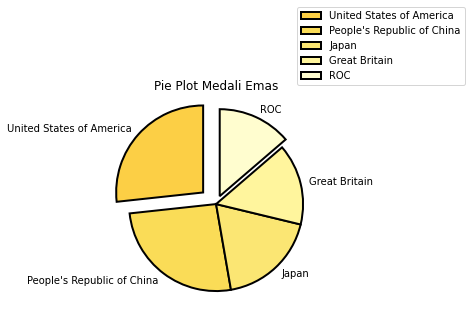

In [37]:
team = medals_df['Team/NOC'].head(5)
gold = medals_df['Gold'].head(5)
warna = ['#fccf45',  '#fadc57', '#fbe673', '#fff59d','#fffdcf']
explode_var = [0.2, 0., 0., 0., 0.1]

plt.pie(gold,
       labels=team,
       colors=warna,
       explode=explode_var,
       startangle=90,
       wedgeprops={'edgecolor':'black', 'linewidth': '2'})

plt.legend(bbox_to_anchor=(0.85,1.025))
plt.title('Pie Plot Medali Emas')
plt.show()

Dari pie chart di atas merupakan 5 negara yang mendapat medali gold terbanyak dan terlihat bahwa bagian yang terpisah lebih jauh berarti mendapatkan gold terbanyak yaitu Amerika sedangkan bagian yang terpisah lebih sedikit berarti mendapatkan gold yang lebih rendah yaitu ROC.

### Negara dengan jumlah medali perak terbanyak

Berikut mencari jumlah medali silver yang diraih setiap negara teratas.

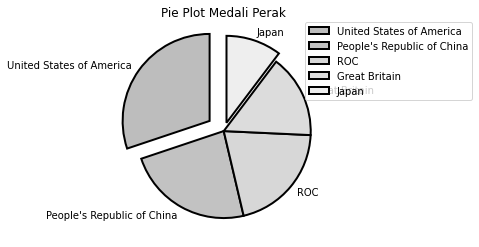

In [38]:
team = medals_df.sort_values('Silver', ascending = False).head(5)['Team/NOC']
silver = medals_df.sort_values('Silver', ascending = False).head(5)['Silver']
warna = ['#bdbdbd', '#c2c2c2', '#d7d7d7', '#dcdcdc','#eeeeee']
explode_var = [0.2, 0., 0., 0., 0.1]

plt.pie(silver,
       labels=team,
       colors=warna,
       explode=explode_var,
       startangle=90,
       wedgeprops={'edgecolor':'black', 'linewidth': '2'})

plt.legend(loc='upper left', bbox_to_anchor=(0.85,1.025))
plt.title('Pie Plot Medali Perak')
plt.show()

Dari pie chart di atas merupakan 5 negara yang mendapat medali silver terbanyak dan terlihat bahwa bagian yang terpisah lebih jauh berarti mendapatkan silver terbanyak yaitu Amerika sedangkan bagian yang terpisah lebih sedikit berarti mendapatkan silver yang lebih rendah yaitu Jepang.

### Negara dengan jumlah medali perunggu terbanyak

Berikut mencari jumlah medali silver yang diraih setiap negara teratas.

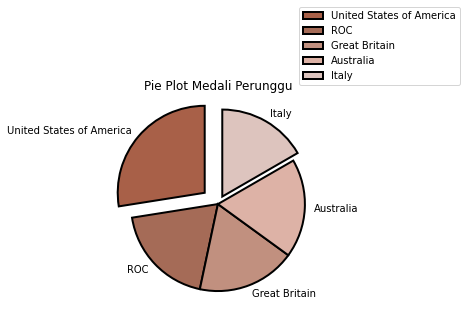

In [39]:
team = medals_df.sort_values('Bronze', ascending = False).head(5)['Team/NOC']
perunggu = medals_df.sort_values('Bronze', ascending = False).head(5)['Bronze']
warna = ['#a86048', '#a56b57', '#c1907f', '#ddb2a6','#ddc4be']
explode_var = [0.2, 0., 0., 0., 0.1]

plt.pie(perunggu,
       labels=team,
       colors=warna,
       explode=explode_var,
       startangle=90,
       wedgeprops={'edgecolor':'black', 'linewidth': '2'})

plt.legend(bbox_to_anchor=(0.85,1.025))
plt.title('Pie Plot Medali Perunggu')
plt.show()

Dari pie chart di atas merupakan 5 negara yang mendapat medali bronze terbanyak dan terlihat bahwa bagian yang terpisah lebih jauh berarti mendapatkan bronze terbanyak yaitu Amerika sedangkan bagian yang terpisah lebih sedikit berarti mendapatkan bronze yang lebih rendah yaitu Italy.

# Teams DataFrame Analysis

Berikut memuat dataset teams untuk mencari informasi data pelatih yang dibutuhkan.

### Read the dataset from xlsx

In [40]:
teams_df = pd.read_excel("Teams.xlsx")

Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [41]:
teams_df

Name      Discipline                         NOC  Event
0          Belgium  3x3 Basketball                     Belgium    Men
1            China  3x3 Basketball  People's Republic of China    Men
2            China  3x3 Basketball  People's Republic of China  Women
3           France  3x3 Basketball                      France  Women
4            Italy  3x3 Basketball                       Italy  Women
..             ...             ...                         ...    ...
738   South Africa      Water Polo                South Africa  Women
739          Spain      Water Polo                       Spain    Men
740          Spain      Water Polo                       Spain  Women
741  United States      Water Polo    United States of America    Men
742  United States      Water Polo    United States of America  Women

[743 rows x 4 columns]

### Information about the dataset

Berikut memanggil fungsi .info() untuk menampilkan informasi detail tentang dataframe.

In [42]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


informasi di atas menunjukkan bahwa terdapat 743 baris dan 4 kolom yang berisi Name, Discipline, NOC, dan Event. Dari data di atas keempat kolom merupakan tipe data object.

### Cabang olahraga yang diikuti team dalam Tokyo Olympics 2021

Berikut adalah analisa cabang olahraga yang diikuti oleh team.

In [43]:
teams_df['Discipline'].unique()

array(['3x3 Basketball', 'Archery', 'Artistic Gymnastics',
       'Artistic Swimming', 'Athletics', 'Baseball/Softball',
       'Basketball', 'Beach Volleyball', 'Cycling Track', 'Fencing',
       'Football', 'Handball', 'Hockey', 'Rhythmic Gymnastics',
       'Rugby Sevens', 'Swimming', 'Table Tennis', 'Triathlon',
       'Volleyball', 'Water Polo'], dtype=object)

Berikut adalah total keseluruhan cabang olahraga.

In [44]:
teams_df['Discipline'].nunique()

20

Terdapat 20 cabang olahraga yang diikuti team dalam olimpiade Tokyo 2020 dan contoh cabang olahra tersebut ada Archery, Basketball, Football, dll.

### Jumlah Tim yang Berpartisipasi dalam setiap Cabang Olahraga

Berikut adalah analisa jumlah team yang berpartisipasi dalam setiap cabang olahraga.

In [45]:
teams_df.groupby('Discipline')['Name'].count().sort_values(ascending=False)

Discipline
Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Beach Volleyball        48
Table Tennis            48
Artistic Swimming       32
Football                28
Artistic Gymnastics     24
Volleyball              24
Basketball              24
Handball                24
Hockey                  24
Rugby Sevens            24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: Name, dtype: int64

Data tersebut terlihat bahwa swimming merupakan partisipasi yang paling diminati banyak team. Berikutnya akan mencari negara dengan jumlah team yang terbanyak.

### Negara dengan jumlah team terbanyak

Berikut adalah analisa negara dengan jumlah team terbanyak.

In [46]:
teams_df.groupby('NOC')['Name'].count().sort_values(ascending=False).head(15)

NOC
Japan                         48
United States of America      47
Italy                         37
Germany                       36
Australia                     35
ROC                           34
People's Republic of China    33
France                        33
Canada                        30
Great Britain                 28
Netherlands                   27
Brazil                        25
Poland                        21
Spain                         20
Republic of Korea             19
Name: Name, dtype: int64

Berikut visualisasi bar chart dari analisa jumlah team setiap negara.

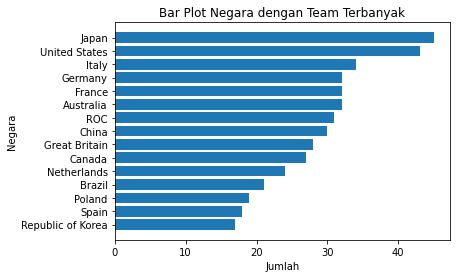

In [47]:
jumlah_team = teams_df.groupby('Name').size()
jumlah_team = jumlah_team.to_frame('Count')
jumlah_team = jumlah_team.sort_values('Count', ascending=False).head(15)

plt.barh(jumlah_team.index.values[::-1], jumlah_team['Count'][::-1])

plt.xlabel('Jumlah')
plt.ylabel('Negara')
plt.title('Bar Plot Negara dengan Team Terbanyak')

plt.show()

Dari data di atas Jepang merupakan jumlah team terbanyak dengan jumlah 48 team yang ikut berpartisipasi.

### Negara dengan jumlah team terendah

Berikut adalah analisa negara dengan jumlah team terendah.

In [48]:
teams_df.groupby('NOC')['Name'].count().sort_values().head(26)

NOC
Angola                 1
Estonia                1
Ghana                  1
Honduras               1
Vietnam                1
Liechtenstein          1
Malaysia               1
Morocco                1
Puerto Rico            1
Qatar                  1
Republic of Moldova    1
Saudi Arabia           1
Singapore              1
Slovakia               1
Uzbekistan             1
Venezuela              1
Ecuador                1
Côte d'Ivoire          1
Zambia                 1
Bahrain                1
Bulgaria               1
Bangladesh             1
Botswana               1
Bahamas                1
Azerbaijan             1
Mongolia               2
Name: Name, dtype: int64

Berikut visualisasi bar chart dari analisa jumlah team setiap negara.

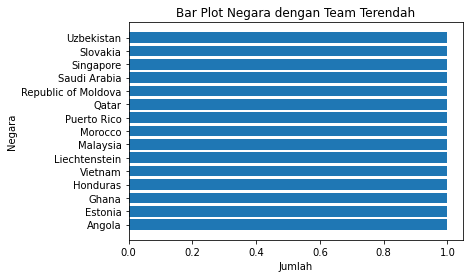

In [49]:
jumlah_team = teams_df.groupby('NOC').size()
jumlah_team = jumlah_team.to_frame('Count')
jumlah_team = jumlah_team.sort_values('Count').head(15)

plt.barh(jumlah_team.index.values, jumlah_team['Count'])

plt.xlabel('Jumlah')
plt.ylabel('Negara')
plt.title('Bar Plot Negara dengan Team Terendah')

plt.show()

Dari data di atas terdapat 25 negara yang memiliki jumlah partisipasi team terendah dan salah satunya yaitu Angola dengan jumlah team yaitu 1.

Pada eksplorasi berikutnya akan menganalisis olimpiade pada tahun-tahun sebelumnya karena akan lebih menarik untuk melanjutkan eksplorasi lebih dalam.

# Olympic Hosts DataFrame Analysis

Berikut memuat dataset Olympic Hosts untuk mencari informasi data yang dibutuhkan.

### Read the dataset from csv

In [50]:
olympic_hosts = pd.read_csv('olympic_hosts.csv')

Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [51]:
olympic_hosts.head(10)

game_slug         game_end_date       game_start_date  \
0           tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
1     pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
2             rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
3           sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   
4          london-2012  2012-08-12T19:00:00Z  2012-07-27T07:00:00Z   
5       vancouver-2010  2010-02-28T04:00:00Z  2010-02-12T16:00:00Z   
6         beijing-2008  2008-08-24T12:00:00Z  2008-08-08T00:00:00Z   
7           turin-2006  2006-02-26T19:00:00Z  2006-02-10T07:00:00Z   
8          athens-2004  2004-08-29T18:00:00Z  2004-08-13T06:00:00Z   
9  salt-lake-city-2002  2002-02-24T08:00:00Z  2002-02-08T15:00:00Z   

        game_location            game_name game_season  game_year  
0               Japan           Tokyo 2020      Summer       2020  
1   Republic of Korea     PyeongChang 2018      Winter       2018  
2              Brazil             Rio 2016      Summer       2016  
3  Russian Federation           Sochi 2014      Winter       2014  
4       Great Britain          London 2012      Summer       2012  
5              Canada       Vancouver 2010      Winter       2010  
6               China         Beijing 2008      Summer       2008  
7               Italy           Turin 2006      Winter       2006  
8              Greece          Athens 2004      Summer       2004  
9       United States  Salt Lake City 2002      Winter       2002

Berikut memanggil fungsi .info() untuk menampilkan informasi detail tentang dataframe.

In [52]:
olympic_hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        52 non-null     object
 1   game_end_date    52 non-null     object
 2   game_start_date  52 non-null     object
 3   game_location    52 non-null     object
 4   game_name        52 non-null     object
 5   game_season      52 non-null     object
 6   game_year        52 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


informasi di atas menunjukkan bahwa terdapat 52 baris dan 7 kolom yang berisi game_slug (tempat & tahun Olimpiade), game_end_date (tanggal Olimpiade berakhir), game_start_date (tanggal Olimpiade dimulai), game_location (lokasi Olimpiade), game_name (tempat & tahun Olimpiade), game_season (musim Olimpiade), dan game_year (tahun Olimpiade). Dari data di atas terdapat data dengan tipe object dan int.

In [53]:
lokasi_olimpiade = olympic_hosts.groupby('game_location').size().to_frame('Jumlah').sort_values('Jumlah', ascending=False)
lokasi_olimpiade.head()

Jumlah
game_location        
United States       8
France              5
Japan               4
Italy               3
Canada              3

Dari data di atas terlihat olimpiade kebanyakan diadakan di Amerika. Ini bisa mempengaruhi negara seperti Amerika dengan mendapatkan medali lebih banyak karena memungkinkan sebagai tuan rumah dalam menyelenggarakan olimpiade membutuhkan biaya yang tinggi sehingga setiap negara tidak akan menyia-nyiakan kesempatan dengan mengeluarkan uang dan usaha yang lebih untuk mempersiapkan atlet mereka dalam bertanding.

# Olympic Athletes DataFrame Analysis

Berikut memuat dataset Olympic Athletes untuk mencari informasi data yang dibutuhkan.

### Read the dataset from csv

In [54]:
olympic_athletes = pd.read_csv('olympic_athletes.csv')

Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [55]:
olympic_athletes

athlete_url athlete_full_name  \
0           https://olympics.com/en/athletes/dongqi-chen       Dongqi CHEN   
1       https://olympics.com/en/athletes/sagen-maddalena   Sagen MADDALENA   
2       https://olympics.com/en/athletes/maria-martynova   Maria MARTYNOVA   
3        https://olympics.com/en/athletes/yulia-karimova    Yulia KARIMOVA   
4       https://olympics.com/en/athletes/najmeh-khedmati   Najmeh KHEDMATI   
...                                                  ...               ...   
74726    https://olympics.com/en/athletes/douglas-weigle    Douglas WEIGLE   
74727  https://olympics.com/en/athletes/stefania-bertele  Stefania BERTELE   
74728    https://olympics.com/en/athletes/walter-cecconi    Walter CECCONI   
74729      https://olympics.com/en/athletes/susan-kelley      Susan KELLEY   
74730  https://olympics.com/en/athletes/andrew-stroukoff  Andrew STROUKOFF   

           first_game  athlete_year_birth    athlete_medals  \
0          Tokyo 2020              1988.0               NaN   
1          Tokyo 2020              1993.0               NaN   
2          Tokyo 2020              1997.0               NaN   
3          Tokyo 2020              1994.0  \n\n\n2\n\nB\n\n   
4            Rio 2016              1996.0               NaN   
...               ...                 ...               ...   
74726  Innsbruck 1976              1955.0               NaN   
74727  Innsbruck 1976              1957.0               NaN   
74728  Innsbruck 1976              1957.0               NaN   
74729  Innsbruck 1976              1954.0               NaN   
74730  Innsbruck 1976              1960.0               NaN   

       games_participations                                                bio  
0                       NaN                                                NaN  
1                       NaN                                                NaN  
2                       NaN                                                NaN  
3                       1.0                                                NaN  
4                       3.0                                                NaN  
...                     ...                                                ...  
74726                   1.0  \n\n\nKent Weigle competed in ice dancing with...  
74727                   1.0  \n\n\nStefania Bertele had the following place...  
74728                   1.0  \n\n\nWalter Cecconi had the following placeme...  
74729                   1.0  \n\n\nSusie Kelley competed in ice dancing wit...  
74730                   1.0  \n\n\nAndrew Stroukoff competed in ice dancing...  

[74731 rows x 7 columns]

Berikut memanggil fungsi .info() untuk menampilkan informasi detail tentang dataframe.

In [56]:
olympic_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74731 entries, 0 to 74730
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           74731 non-null  object 
 1   athlete_full_name     74731 non-null  object 
 2   first_game            74717 non-null  object 
 3   athlete_year_birth    72287 non-null  float64
 4   athlete_medals        13391 non-null  object 
 5   games_participations  71285 non-null  float64
 6   bio                   22831 non-null  object 
dtypes: float64(2), object(5)
memory usage: 4.0+ MB


informasi di atas menunjukkan bahwa terdapat 74731 baris dan 7 kolom yang berisi nama kolom athlete_url (situs Olimpiade biodata atlet), athlete_full_name (nama lengkapa atlet), first_game (tempat & tahun Olimpiade pertama atlet), athlete_year_birth (tahun lahir atlet), athlete_medals (medali atlet), games_participations (jumlah partisipasi), dan bio (biodata atlet). Dari data di atas terdapat tipe data yang berbeda yaitu object dan float.

# Olympic Medals DataFrame Analysis

Berikut memuat dataset Olympic Medals untuk mencari informasi data yang dibutuhkan.

### Read the dataset from csv

In [57]:
olympic_medals = pd.read_csv('olympic_medals.csv')

Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [58]:
olympic_medals

discipline_title    slug_game                      event_title  \
0             Shooting   tokyo-2020                  Trap Mixed Team   
1             Shooting   tokyo-2020                  Trap Mixed Team   
2             Shooting   tokyo-2020                  Trap Mixed Team   
3             Shooting   tokyo-2020                  Trap Mixed Team   
4             Shooting   tokyo-2020                  Trap Mixed Team   
...                ...          ...                              ...   
21305    Weightlifting  athens-1896  heavyweight - one hand lift men   
21306    Weightlifting  athens-1896  heavyweight - one hand lift men   
21307    Weightlifting  athens-1896  heavyweight - two hand lift men   
21308    Weightlifting  athens-1896  heavyweight - two hand lift men   
21309    Weightlifting  athens-1896  heavyweight - two hand lift men   

      event_gender medal_type participant_type         participant_title  \
0            Mixed       GOLD         GameTeam                     Spain   
1            Mixed       GOLD         GameTeam                     Spain   
2            Mixed     SILVER         GameTeam                San Marino   
3            Mixed     SILVER         GameTeam                San Marino   
4            Mixed     BRONZE         GameTeam  United States of America   
...            ...        ...              ...                       ...   
21305          Men     SILVER          Athlete                       NaN   
21306          Men     BRONZE          Athlete                       NaN   
21307          Men       GOLD          Athlete                       NaN   
21308          Men     SILVER          Athlete                       NaN   
21309          Men     BRONZE          Athlete                       NaN   

                                             athlete_url  \
0         https://olympics.com/en/athletes/fatima-galvez   
1      https://olympics.com/en/athletes/alberto-ferna...   
2      https://olympics.com/en/athletes/alessandra-pe...   
3      https://olympics.com/en/athletes/gian-marco-berti   
4      https://olympics.com/en/athletes/madelynn-ann-...   
...                                                  ...   
21305      https://olympics.com/en/athletes/viggo-jensen   
21306                                                NaN   
21307      https://olympics.com/en/athletes/viggo-jensen   
21308  https://olympics.com/en/athletes/launceston-el...   
21309   https://olympics.com/en/athletes/sotirios-versis   

             athlete_full_name              country_name country_code  \
0                Fatima GALVEZ                     Spain           ES   
1            Alberto FERNANDEZ                     Spain           ES   
2           Alessandra PERILLI                San Marino           SM   
3             Gian Marco BERTI                San Marino           SM   
4          Madelynn Ann BERNAU  United States of America           US   
...                        ...                       ...          ...   
21305             Viggo JENSEN                   Denmark           DK   
21306  Alexandros Nikolopoulos                    Greece           GR   
21307             Viggo JENSEN                   Denmark           DK   
21308        Launceston ELLIOT             Great Britain           GB   
21309          Sotirios VERSIS                    Greece           GR   

      country_3_letter_code  
0                       ESP  
1                       ESP  
2                       SMR  
3                       SMR  
4                       USA  
...                     ...  
21305                   DEN  
21306                   GRE  
21307                   DEN  
21308                   GBR  
21309                   GRE  

[21310 rows x 12 columns]

Berikut memanggil fungsi .info() untuk menampilkan informasi detail tentang dataframe.

In [59]:
olympic_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21310 non-null  object
 1   slug_game              21310 non-null  object
 2   event_title            21310 non-null  object
 3   event_gender           21310 non-null  object
 4   medal_type             21310 non-null  object
 5   participant_type       21310 non-null  object
 6   participant_title      6444 non-null   object
 7   athlete_url            16686 non-null  object
 8   athlete_full_name      17738 non-null  object
 9   country_name           21310 non-null  object
 10  country_code           19798 non-null  object
 11  country_3_letter_code  21310 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


informasi di atas menunjukkan bahwa terdapat 21310 baris dan 12 kolom yang berisi discipline_title (cabang olahraga), slug_game (tempat & tahun olimpaide), event_title (tipe olahraga), event_gender (jenis kelamin), medal_type (medali), participant_type (tipe partisipasi), participant_title (negara partisipasi), athlete_url (situs Olimpiade biodata atlet), athlete_full_name (nama lengkat atlet), country_name (nama negara), country_code (kode negara), dan country_3_letter_code (3 huruf kode negara). Dari data di atas semua kolom bertipe data object.

# Olympic Results DataFrame Analysis

Berikut memuat dataset Olympic Results untuk mencari informasi data yang dibutuhkan.

### Read the dataset from csv

In [60]:
olympic_results = pd.read_csv('olympic_results.csv')

Setelah dimuat akan dijalankan dengan memanggil variabel untuk menampilkan dataset.

In [61]:
olympic_results

discipline_title  \
0                  Shooting   
1                  Shooting   
2                  Shooting   
3                  Shooting   
4                  Shooting   
...                     ...   
159015          Ski Jumping   
159016          Ski Jumping   
159017          Ski Jumping   
159018          Ski Jumping   
159019  Gymnastics Artistic   

                                              event_title      slug_game  \
0                                         Trap Mixed Team     tokyo-2020   
1                                         Trap Mixed Team     tokyo-2020   
2                                         Trap Mixed Team     tokyo-2020   
3                                         Trap Mixed Team     tokyo-2020   
4                                         Trap Mixed Team     tokyo-2020   
...                                                   ...            ...   
159015                         Normal Hill Individual men  chamonix-1924   
159016                         Normal Hill Individual men  chamonix-1924   
159017                         Normal Hill Individual men  chamonix-1924   
159018                         Normal Hill Individual men  chamonix-1924   
159019  26th Federal Festival, Society and Association...     paris-1900   

       participant_type medal_type  \
0              GameTeam       GOLD   
1              GameTeam     SILVER   
2              GameTeam     BRONZE   
3              GameTeam        NaN   
4              GameTeam        NaN   
...                 ...        ...   
159015          Athlete        NaN   
159016          Athlete        NaN   
159017          Athlete        NaN   
159018          Athlete        NaN   
159019         GameTeam        NaN   

                                                 athletes rank_equal  \
0       [('Fatima GALVEZ', 'https://olympics.com/en/at...      False   
1       [('Alessandra PERILLI', 'https://olympics.com/...      False   
2       [('Madelynn Ann BERNAU', 'https://olympics.com...      False   
3       [('Zuzana STEFECEKOVA', 'https://olympics.com/...      False   
4       [('Yukie NAKAYAMA', 'https://olympics.com/en/a...      False   
...                                                   ...        ...   
159015                                                NaN        NaN   
159016                                                NaN        NaN   
159017                                                NaN        NaN   
159018                                                NaN        NaN   
159019                                                NaN        NaN   

       rank_position              country_name country_code  \
0                  1                     Spain           ES   
1                  2                San Marino           SM   
2                  3  United States of America           US   
3                  4                  Slovakia           SK   
4                  5                     Japan           JP   
...              ...                       ...          ...   
159015           DNS                    Poland           PL   
159016           DNS                    Poland           PL   
159017           DNS            Czechoslovakia         CSHH   
159018           DNS  United States of America           US   
159019             1                    France           FR   

       country_3_letter_code  \
0                        ESP   
1                        SMR   
2                        USA   
3                        SVK   
4                        JPN   
...                      ...   
159015                   POL   
159016                   POL   
159017                   TCH   
159018                   USA   
159019                   FRA   

                                              athlete_url   athlete_full_name  \
0                                                     NaN                 NaN   
1                                                     NaN                 NaN   
2                 

Berikut memanggil fungsi .info() untuk menampilkan informasi detail tentang dataframe.

In [62]:
olympic_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159020 entries, 0 to 159019
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       159020 non-null  object
 1   event_title            159020 non-null  object
 2   slug_game              159020 non-null  object
 3   participant_type       159020 non-null  object
 4   medal_type             19879 non-null   object
 5   athletes               7785 non-null    object
 6   rank_equal             28742 non-null   object
 7   rank_position          155152 non-null  object
 8   country_name           159020 non-null  object
 9   country_code           153990 non-null  object
 10  country_3_letter_code  159020 non-null  object
 11  athlete_url            126677 non-null  object
 12  athlete_full_name      138332 non-null  object
 13  value_unit             75711 non-null   object
 14  value_type             86859 non-null   object
dtype

informasi di atas menunjukkan bahwa terdapat 159020 baris dan 15 kolom yang berisi discipline_title (cabang olahraga), event_title (tipe olahraga), slug_game (tempat & tahun Olimpiade), participant_type (tipe partisipasi), medal_type (medali), athletes (data atlet), rank_equal, rank_position (posisi rank), country_name (nama negara), country_code (kode negara), country_3_letter_code (3 huruf kode negara), athlete_url (biodata atlet), athlete_full_name (nama lengkap atlet), value_unit, dan value_type. Dari data di atas seluruh kolom merupakan tipe data object.

Berikut analisis dari dataset yang sudah dimuat.

# Tempat & Tahun Olimpiade Tahun 1986-2021

Berikut akan mencari seluruh tempat & tahun olimpiade yang pernah diadakan.

In [63]:
olympic_results['slug_game'].unique()

array(['tokyo-2020', 'pyeongchang-2018', 'rio-2016', 'sochi-2014',
       'london-2012', 'vancouver-2010', 'beijing-2008', 'turin-2006',
       'athens-2004', 'salt-lake-city-2002', 'sydney-2000', 'nagano-1998',
       'atlanta-1996', 'lillehammer-1994', 'barcelona-1992',
       'albertville-1992', 'seoul-1988', 'calgary-1988',
       'los-angeles-1984', 'sarajevo-1984', 'moscow-1980',
       'lake-placid-1980', 'montreal-1976', 'innsbruck-1976',
       'munich-1972', 'sapporo-1972', 'mexico-city-1968', 'grenoble-1968',
       'tokyo-1964', 'innsbruck-1964', 'rome-1960', 'squaw-valley-1960',
       'melbourne-1956', 'cortina-d-ampezzo-1956', 'helsinki-1952',
       'oslo-1952', 'london-1948', 'st-moritz-1948', 'berlin-1936',
       'garmisch-partenkirchen-1936', 'los-angeles-1932',
       'lake-placid-1932', 'amsterdam-1928', 'st-moritz-1928',
       'paris-1924', 'chamonix-1924', 'antwerp-1920', 'stockholm-1912',
       'london-1908', 'st-louis-1904', 'paris-1900', 'athens-1896'],
   

Berikut memanggil fungsi .nunique() untuk menghitung jumlah nilai unik di setiap kolom.

In [64]:
olympic_results['slug_game'].nunique()

52

Dari data di atas terlihat bahwa terdapat 52 tempat & tahun olimpiade yang pernah diadakan. Tempat & tahun pertama kali diadakan yaitu di Athens tahun 1896, sedangkan tempat & tahun terakhir diadakan yaitu di Tokyo pada tahun 2020. Dalam olimpiade ini terdapat dua musim yang diadakan yaitu musim panas dan musim dingin.

Pada bagian berikut akan mencari olimpiade mana saja yang diadakan di musim panas atau musim dingin. Sebelum memulai eksplorasi mencari musim, pertama harus menggabungkan dua dataset agar dapat mencari musim berdasarkan tempat dan tahun olimpiade.

## Menggabungkan dataset olympic_hosts dan olympic_medals

In [65]:
olympic_results = pd.merge(olympic_hosts, olympic_medals,
                           left_on=  ['game_slug'],
                           right_on= ['slug_game'],
                           how = 'left')
olympic_results.head(10)

game_slug         game_end_date       game_start_date game_location  \
0  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
1  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
2  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
3  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
4  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
5  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
6  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
7  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
8  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   
9  tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z         Japan   

    game_name game_season  game_year discipline_title   slug_game  \
0  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
1  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
2  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
3  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
4  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
5  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
6  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
7  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
8  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   
9  Tokyo 2020      Summer       2020         Shooting  tokyo-2020   

                   event_title event_gender medal_type participant_type  \
0              Trap Mixed Team        Mixed       GOLD         GameTeam   
1              Trap Mixed Team        Mixed       GOLD         GameTeam   
2              Trap Mixed Team        Mixed     SILVER         GameTeam   
3              Trap Mixed Team        Mixed     SILVER         GameTeam   
4              Trap Mixed Team        Mixed     BRONZE         GameTeam   
5              Trap Mixed Team        Mixed     BRONZE         GameTeam   
6  50m Rifle 3 Positions women        Women     SILVER          Athlete   
7  50m Rifle 3 Positions women        Women     BRONZE          Athlete   
8  50m Rifle 3 Positions women        Women       GOLD          Athlete   
9    50m Rifle 3 Positions Men          Men     BRONZE          Athlete   

          participant_title  \
0                     Spain   
1                     Spain   
2                San Marino   
3                San Marino   
4  United States of America   
5  United States of America   
6                       NaN   
7                       NaN   
8                       NaN   
9                       NaN   

                                         athlete_url    athlete_full_name  \
0     https://olympics.com/en/athletes/fatima-galvez        Fatima GALVEZ   
1  https://olympics.com/en/athletes/alberto-ferna...    Alberto FERNANDEZ   
2  https://olympics.com/en/athletes/alessandra-pe...   Alessandra PERILLI   
3  https://olympics.com/en/athletes/gian-marco-berti     Gian Marco BERTI   
4  https://olympics.com/en/athletes/madelynn-ann-...  Madelynn Ann BERNAU   
5     https://olympics.com/en/athletes/brian-burrows        Brian BURROWS   
6      https://olympics.com/en/athletes/yulia-zykova         Yulia ZYKOVA   
7    https://olympics.com/en/athletes/yulia-karimova       Yulia KARIMOVA   
8     https://olympics.com/en/athletes/nina-christen        Nina CHRISTEN   
9     https://olympics.com/en/athletes/milenko-sebic        Milenko SEBIC   

               country_name country_code country_3_letter_code  
0                     Spain           ES                   ESP  
1                     Spain           ES                   ESP  
2                San Marino           SM                   SMR  
3                San Marino           SM                   SMR  
4  United States of America           US                   USA  
5  United St

### Tempat & tahun olimpiade pada saat musim panas

Berikut hasil analisa tempat dan tahun olimpiade pada saat musim panas.

In [66]:
tempat_tahun_olimpiade_summer = olympic_results[(olympic_results['game_season'] == 'Summer')]
jumlah_tempat_tahun_olimpiade_summer = tempat_tahun_olimpiade_summer['slug_game'].unique()
jumlah_tempat_tahun_olimpiade_summer = pd.DataFrame(jumlah_tempat_tahun_olimpiade_summer, columns = ['Season'])
jumlah_tempat_tahun_olimpiade_summer

Season
0         tokyo-2020
1           rio-2016
2        london-2012
3       beijing-2008
4        athens-2004
5        sydney-2000
6       atlanta-1996
7     barcelona-1992
8         seoul-1988
9   los-angeles-1984
10       moscow-1980
11     montreal-1976
12       munich-1972
13  mexico-city-1968
14        tokyo-1964
15         rome-1960
16    melbourne-1956
17     helsinki-1952
18       london-1948
19       berlin-1936
20  los-angeles-1932
21    amsterdam-1928
22        paris-1924
23      antwerp-1920
24    stockholm-1912
25       london-1908
26     st-louis-1904
27        paris-1900
28       athens-1896

Dari data di atas terlihat bahwa terdapat 29 season yang pernah diadakan pada musim panas. Pertama kali diadakan yaitu di Athen pada tahun 1896 sedangkan terakhir diadakan di Tokyo pada tahun 2020.

### Tempat & tahun olimpiade pada saat musim dingin

Berikut hasil analisa tempat dan tahun olimpiade pada saat musim dingin.

In [67]:
tempat_tahun_olimpiade_winter = olympic_results[(olympic_results['game_season'] == 'Winter')]
jumlah_tempat_tahun_olimpiade_winter = tempat_tahun_olimpiade_winter['slug_game'].unique()
jumlah_tempat_tahun_olimpiade_winter = pd.DataFrame(jumlah_tempat_tahun_olimpiade_winter, columns = ['Season'])
jumlah_tempat_tahun_olimpiade_winter

Season
0              pyeongchang-2018
1                    sochi-2014
2                vancouver-2010
3                    turin-2006
4           salt-lake-city-2002
5                   nagano-1998
6              lillehammer-1994
7              albertville-1992
8                  calgary-1988
9                 sarajevo-1984
10             lake-placid-1980
11               innsbruck-1976
12                 sapporo-1972
13                grenoble-1968
14               innsbruck-1964
15            squaw-valley-1960
16       cortina-d-ampezzo-1956
17                    oslo-1952
18               st-moritz-1948
19  garmisch-partenkirchen-1936
20             lake-placid-1932
21               st-moritz-1928
22                chamonix-1924

Dari data diatas terlihat bahwa terdapat 23 season yang pernah diadakan pada musim dingin. Pertama kali diadakan yaitu di Chamonix pada tahun 1924 sedangkan terakhir diadakan di Pyeongchang pada tahun 2018.

Berikut analisa perbandingan Olimpiade musim panas dan musim dingin.

In [68]:
tempat_tahun_olimpiade_gab = pd.merge(jumlah_tempat_tahun_olimpiade_summer, jumlah_tempat_tahun_olimpiade_winter, left_index= True, right_index = True)
tempat_tahun_olimpiade_gab.rename(columns={'Season_x':'Season summer','Season_y':'Season winter'})

Season summer                Season winter
0         tokyo-2020             pyeongchang-2018
1           rio-2016                   sochi-2014
2        london-2012               vancouver-2010
3       beijing-2008                   turin-2006
4        athens-2004          salt-lake-city-2002
5        sydney-2000                  nagano-1998
6       atlanta-1996             lillehammer-1994
7     barcelona-1992             albertville-1992
8         seoul-1988                 calgary-1988
9   los-angeles-1984                sarajevo-1984
10       moscow-1980             lake-placid-1980
11     montreal-1976               innsbruck-1976
12       munich-1972                 sapporo-1972
13  mexico-city-1968                grenoble-1968
14        tokyo-1964               innsbruck-1964
15         rome-1960            squaw-valley-1960
16    melbourne-1956       cortina-d-ampezzo-1956
17     helsinki-1952                    oslo-1952
18       london-1948               st-moritz-1948
19       berlin-1936  garmisch-partenkirchen-1936
20  los-angeles-1932             lake-placid-1932
21    amsterdam-1928               st-moritz-1928
22        paris-1924                chamonix-1924

Pada data di atas terlihat setiap season didakan 4 tahun sekali. Setelah itu terlihat perbedaan antara season summer dan season winter yang diletakkan bersebelahan dengan perbedaan jangka waktu 2 tahun antara dua season.

# Cabang olahraga

Berikut akan mencari seluruh cabang olahraga selama olimpiade yang pernah diadakan.

### Cabang olahraga yang diadakan di olimpiade tahun 1986-2021

In [69]:
olympic_results['discipline_title'].unique()

array(['Shooting', 'Diving', 'Canoe Sprint', 'Cycling Road', 'Football',
       'Boxing', 'Artistic Swimming', 'Handball', 'Rugby Sevens',
       'Cycling BMX Racing', 'Triathlon', 'Surfing', 'Table Tennis',
       'Canoe Slalom', 'Marathon Swimming', 'Trampoline Gymnastics',
       'Volleyball', 'Basketball', 'Taekwondo', 'Cycling Track',
       'Fencing', 'Badminton', 'Water Polo', 'Sport Climbing',
       'Wrestling', 'Tennis', 'Artistic Gymnastics', 'Golf',
       'Cycling BMX Freestyle', 'Judo', 'Skateboarding', 'Archery',
       'Weightlifting', 'Baseball/Softball', 'Equestrian',
       'Modern Pentathlon', 'Athletics', 'Swimming', 'Sailing',
       'Cycling Mountain Bike', 'Rowing', 'Karate', '3x3 Basketball',
       'Rhythmic Gymnastics', 'Hockey', 'Beach Volleyball', 'Skeleton',
       'Speed skating', 'Biathlon', 'Snowboard', 'Freestyle Skiing',
       'Nordic Combined', 'Curling', 'Figure skating', 'Ski Jumping',
       'Short Track', 'Alpine Skiing', 'Luge', 'Ice Hockey',
 

Berikut memanggil fungsi .nunique() untuk menghitung jumlah nilai unik di setiap kolom.

In [70]:
olympic_results['discipline_title'].nunique()

86

Dari data yang sudah dicari terdapat 86 cabang olahraga yang pernah didakan seperti shooting, diving, canoe sprint, dll.

### Cabang olahraga secara keseluruhan

Berikut adalah analisa dalam mencari jumlah partisipasi cabang olahraga secara keseluruhan.

In [71]:
cabang_olahraga = olympic_results['discipline_title'].value_counts().reset_index(name='Jumlah')
cabang_olahraga

index  Jumlah
0           Athletics    3076
1            Swimming    1763
2           Wrestling    1354
3              Rowing    1068
4              Boxing     996
..                ...     ...
81       Jeu de Paume       3
82  Water Motorsports       3
83              Roque       3
84            Cricket       2
85      Basque Pelota       2

[86 rows x 2 columns]

Berikut visualisasi bar chart dari analisa seluruh cabang olahraga pada di atas.

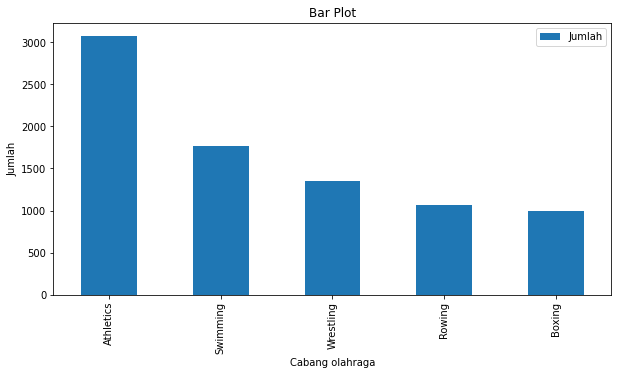

In [72]:
cabang_olahraga[:5].plot(kind='bar', x='index', y='Jumlah', figsize = (10, 5))

plt.title('Bar Plot')
plt.xlabel('Cabang olahraga')
plt.ylabel('Jumlah')
plt.show()

Data tersebut menunjukkan cabang olahraga yang paling diminati yaitu athletics dengan jumlah 3076 peserta yang diikuti dengan posisi kedua diminati yaitu swimming berikutnya ada wrestling lalu rowing dan boxing.

Berikutnya mencari perbedaan cabang olahraga pada musim panas dan dingin.

## Perbedaan cabang olahraga pada musim panas dan dingin

### Cabang olahraga musim panas

Berikut adalah analisa cabang olahraga pada musim panas.

In [73]:
cabang_olahraga_summer = olympic_results[(olympic_results['game_season'] == 'Summer')]
jumlah_cabang_olahraga_summer = cabang_olahraga_summer['discipline_title'].value_counts().reset_index(name='Jumlah')
jumlah_cabang_olahraga_summer

index  Jumlah
0           Athletics    3076
1            Swimming    1763
2           Wrestling    1354
3              Rowing    1068
4              Boxing     996
..                ...     ...
66       Jeu de Paume       3
67  Water Motorsports       3
68              Roque       3
69            Cricket       2
70      Basque Pelota       2

[71 rows x 2 columns]

Olimpiade musim panas diadakan yang diadakan 4 tahun sekali ini memiliki banyak cabang olahraga yaitu terdapat 71 cabang olahraga yang pernah diadakan dan contohnya seperti rugby, swimming, baseball, tennis, dll.

Berikut merupakan visualisasi bar chart padana cabang olahraga musim panas.

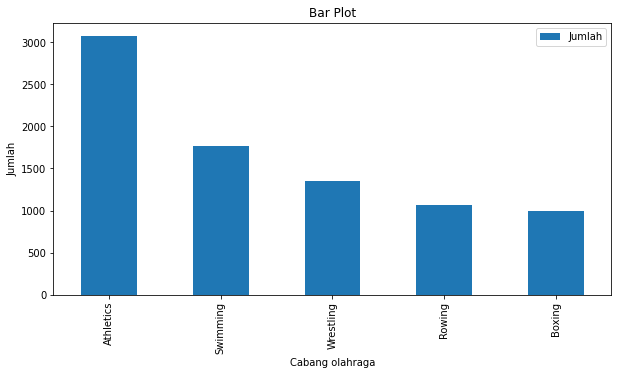

In [74]:
jumlah_cabang_olahraga_summer[:5].plot(kind='bar', x='index', y='Jumlah', figsize = (10, 5))

plt.title('Bar Plot')
plt.xlabel('Cabang olahraga')
plt.ylabel('Jumlah')
plt.show()

Cabang olahraga yang paling diminati pada saat musim summer adalah Athletics dengan jumlah 3076 peserta. Posisi kedua adalah swimming dan diikuti cabang olahraga wrestling sebagai posisi ketiga.

### Cabang olahraga musim dingin

Berikut adalah analisa cabang olahraga pada musim dingin.

In [75]:
cabang_olahraga_winter = olympic_results[(olympic_results['game_season'] == 'Winter')]
jumlah_cabang_olahraga_winter = cabang_olahraga_winter['discipline_title'].value_counts().reset_index(name='Jumlah')
jumlah_cabang_olahraga_winter

index  Jumlah
0               Speed skating     569
1        Cross Country Skiing     532
2               Alpine Skiing     461
3              Figure skating     356
4                    Biathlon     253
5                   Bobsleigh     217
6                        Luge     186
7                 Ski Jumping     147
8   Short Track Speed Skating     144
9            Freestyle Skiing     132
10                  Snowboard     120
11            Nordic Combined     111
12                 Ice Hockey      87
13                    Curling      45
14                   Skeleton      36
15                Short Track      24
16            Military Patrol       3

Berbeda dengan olimpiade musim panas, olimpiade musim dingin memiliki 17 cabang olahraga yang pernah diadakan. Beberapa olahraga musim dingin paling populer yaitu speed skating, cross country skiing, alpine skiing, dll.

Berikut merupakan visualisasi bar chart padana cabang olahraga musim dingin.

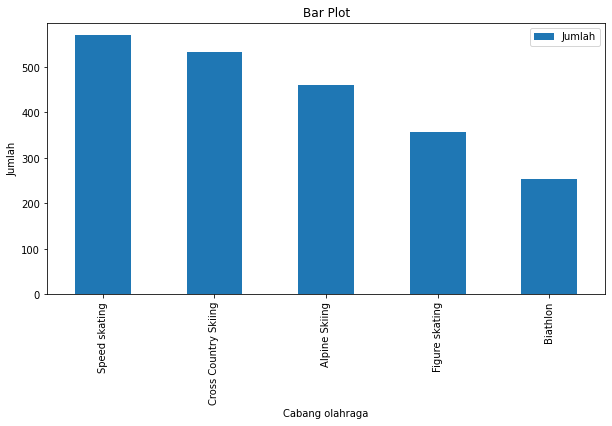

In [76]:
jumlah_cabang_olahraga_winter[:5].plot(kind='bar', x='index', y='Jumlah', figsize = (10, 5))

plt.title('Bar Plot')
plt.xlabel('Cabang olahraga')
plt.ylabel('Jumlah')
plt.show()

Cabang olahraga yang paling diminati pada saat musim winter adalah speed skating dengan jumlah 569 peserta. Posisi kedua adalah cross country skiing dan diikuti oleh alpine skiing.

### Persamaan Cabang Olahraga di Musim Panas & Musim Dingin

Berikut mencari persamaan cabang olahraga yang diadakan di musim panas dan musim dingin.

In [77]:
cabang_olahraga_gab = pd.merge(jumlah_cabang_olahraga_summer, jumlah_cabang_olahraga_winter, 
                               how ='inner', on =['index', 'index'])
cabang_olahraga_gab.rename(columns={'index':'Cabang olahraga','Jumlah_x':'Jumlah pada saat musim panas',
                                    'Jumlah_y':'Jumlah pada saat musim dingin'})

Cabang olahraga  Jumlah pada saat musim panas  Jumlah pada saat musim dingin
0  Figure skating                            27                            356
1      Ice Hockey                             3                             87

Dari data di atas terlihat bahwa terdapat 2 persamaan cabang olahraga pada saat musim panas dan musim dingin. Pada cabang olahraga figure skating musim panas terdapat 27 yang ikut serta sedangkan pada musim dingin memiliki lebih banyak peserta yaitu 356 peserta. Yang kedua terdapat cabang olahraga ice hockey, pada musim panas terdapat 3 peserta sedangkan musim dingin memiliki 87 peserta.

## Negara yang mendominasi di salah satu top cabang olahraga

### Cabang olahraga summer

Berikut adalah analisa negara yang mendominasi di cabang olahraga musim panas.

In [78]:
dominasi_negara_summer = olympic_results[(olympic_results['medal_type'] == 'GOLD') & 
                                         (olympic_results['discipline_title'] == 'Athletics') & 
                                         (olympic_results['game_season'] == 'Summer')]
dominasi_negara_gold_summer = dominasi_negara_summer['country_name'].value_counts().reset_index(name='GOLD')
dominasi_negara_gold_summer.head(1)

index  GOLD
0  United States of America   341

Data di atas diambil berdasarkan dari cabang olahraga top summer yaitu athletics. Ternyata Amerika yang mendominasi dalam memenangkan banyak gold dalam cabang olahraga ini. Hal ini memungkinkan dipengaruhi karena fasilitas pelatihan yang lebih baik, semangat para atlet, dan populasi yang besar.

### Cabang olahraga winter

Berikut adalah analisa negara yang mendominasi di cabang olahraga musim dingin.

In [79]:
dominasi_negara_winter = olympic_results[(olympic_results['medal_type'] == 'GOLD') & 
                                         (olympic_results['discipline_title'] == 'Speed skating') & 
                                         (olympic_results['game_season'] == 'Winter')]
dominasi_negara_gold_winter = dominasi_negara_winter['country_name'].value_counts().reset_index(name='GOLD')
dominasi_negara_gold_winter.head(1)

index  GOLD
0  Netherlands    42

Data di atas diambil berdasarkan dari cabang olahraga top winter yaitu speed skating. Ternyata Netherlands yang mendominasi dalam memenangkan banyak gold dalam cabang olahraga ini. Hal ini karena memungkinkan Belanda mempunyai peralatan skating yang baik dan sudah berlatih sejak mereka kanak-kanak.

# Medali

Berikut akan mencari jumlah medali gold, silver, dan bronze dari Tahun 1986-2020.

In [80]:
olympic_medals['medal_type'].value_counts()

BRONZE    7401
GOLD      6978
SILVER    6931
Name: medal_type, dtype: int64

Terlihat bahwa jumlah bronze terdapat 7401 medali, ini merupakan jumlah medali terbanyak dibandingkan gold dengan jumlah 6978 medali dan silver berjumlah 6931 medali.

## Perbandingan jumlah medali setiap season pada musim panas dan dingin

Di eksplorasi kali ini akan mencari perbandingan jumlah medali pada seluruh olimpiade. Dalam eksplorasi ini akan mencari perbedaan jumlah medali Olimpiade pada musim panas dan musim dingin. Berikut analisa yang akan dieksplorasi.

### Medali pada musim panas

Pertama mencari jumlah gold pada olimpiade musim panas.

In [81]:
medali_gold_summer = olympic_results[(olympic_results['medal_type'] == 'GOLD') & 
                                     (olympic_results['game_season'] == 'Summer')]
jumlah_medali_gold_summer = medali_gold_summer['slug_game'].value_counts(sort=False).reset_index(name='GOLD')

Berikut adalah analisa mencari silver pada olimpiade musim panas.

In [82]:
medali_silver_summer = olympic_results[ (olympic_results['medal_type'] == 'SILVER') & 
                                       (olympic_results['game_season'] == 'Summer')]
jumlah_medali_silver_summer = medali_silver_summer.slug_game.value_counts(sort=False).reset_index(name='SILVER')

Berikut adalah analisa mencari bronze pada olimpiade musim panas.

In [83]:
medali_bronze_summer = olympic_results[ (olympic_results['medal_type'] == 'BRONZE') & 
                                       (olympic_results['game_season'] == 'Summer')]
jumlah_medali_bronze_summer = medali_bronze_summer.slug_game.value_counts(sort=False).reset_index(name='BRONZE')

Berikut adalah analisa gabungan medali pada olimpiade musim panas.

In [84]:
gold_silver_summer = pd.merge(jumlah_medali_gold_summer, jumlah_medali_silver_summer, how='outer')

In [85]:
medali_gab_summer = pd.merge(gold_silver_summer, jumlah_medali_bronze_summer, how='outer')
medali_gab_summer

index  GOLD  SILVER  BRONZE
0         tokyo-2020   370     369     429
1           rio-2016   337     337     389
2        london-2012   330     330     382
3       beijing-2008   331     331     382
4        athens-2004   333     332     357
5        sydney-2000   332     332     359
6       atlanta-1996   296     298     323
7     barcelona-1992   282     279     326
8         seoul-1988   260     252     285
9   los-angeles-1984   240     233     257
10       moscow-1980   217     217     236
11     montreal-1976   211     212     229
12       munich-1972   205     205     220
13  mexico-city-1968   182     178     191
14        tokyo-1964   171     175     182
15         rome-1960   160     157     167
16    melbourne-1956   156     156     166
17     helsinki-1952   151     154     160
18       london-1948   147     144     147
19       berlin-1936   130     128     130
20  los-angeles-1932   119     120     118
21    amsterdam-1928   111     109     111
22        paris-1924   131     133     130
23      antwerp-1920   161     154     142
24    stockholm-1912   107     108     108
25       london-1908   116     113     114
26     st-louis-1904   100      95      95
27        paris-1900    98      97      94
28       athens-1896    44      44      38

Berikut adalah visualisasi line chart pada perbandingan jumlah gold, silver, dan bronze.

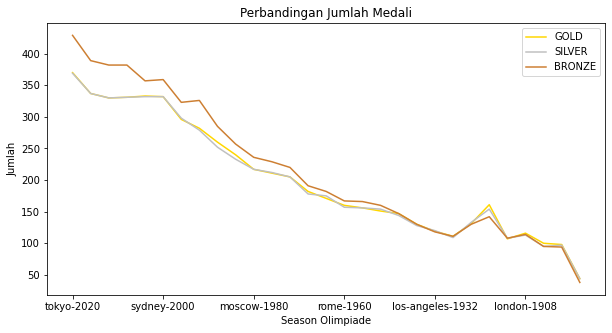

In [86]:
ax = plt.gca()

jumlah_medali_gold_summer.plot(kind='line', x='index', y='GOLD', color='#FFD700', ax=ax, figsize = (10, 5))
jumlah_medali_silver_summer.plot(kind='line', x='index', y='SILVER', color='#C0C0C0', ax=ax)
jumlah_medali_bronze_summer.plot(kind='line', x='index', y='BRONZE', color='#CD7F32', ax=ax)

plt.title('Perbandingan Jumlah Medali')
plt.xlabel('Season Olimpiade')
plt.ylabel('Jumlah')
plt.show()

Dari data di atas bahwa hampir setiap tahun jumlah medali meningkat. Lalu terdapat perbandingan seluruh olimpiade pada musim panas dengan jumlah medali gold, silver, dan bronze yang berbeda. Olimpiade pada musim panas yang paling banyak jumlah medali yaitu di Tokyo pada tahun 2021. Pada Olimpiade Tokyo 2021 terdapat 370 gold, 369 silver, dan 429 bronze. Sedangkan Olimpiade yang mendapatkan jumlah paling sedikit yaitu di Athens pada tahun 1896 dengan jumlah 44 gold, 44 silver, dan 38 bronze.

## Medali pada saat musim dingin

Pertama mencari jumlah gold pada olimpiade musim dingin.

In [87]:
medali_gold_winter = olympic_results[(olympic_results['medal_type'] == 'GOLD') & 
                                     (olympic_results['game_season'] == 'Winter')]
jumlah_medali_gold_winter = medali_gold_winter.slug_game.value_counts(sort=False).reset_index(name='GOLD')

Berikut adalah analisa mencari silver pada olimpiade musim dingin.

In [88]:
medali_silver_winter = olympic_results[ (olympic_results['medal_type'] == 'SILVER') & 
                                       (olympic_results['game_season'] == 'Winter')]
jumlah_medali_silver_winter = medali_silver_winter.slug_game.value_counts(sort=False).reset_index(name='SILVER')

Berikut adalah analisa mencari bronze pada olimpiade musim dingin.

In [89]:
medali_bronze_winter = olympic_results[ (olympic_results['medal_type'] == 'BRONZE') & 
                                       (olympic_results['game_season'] == 'Winter')]
jumlah_medali_bronze_winter = medali_bronze_winter.slug_game.value_counts(sort=False).reset_index(name='BRONZE')

Berikut adalah analisa gabungan medali pada olimpiade musim dingin.

In [90]:
gold_silver_winter = pd.merge(jumlah_medali_gold_winter, jumlah_medali_silver_winter, how='outer')

In [91]:
medali_gab_winter = pd.merge(gold_silver_winter, jumlah_medali_bronze_winter, how='outer')
medali_gab_winter

index  GOLD  SILVER  BRONZE
0              pyeongchang-2018   112     109     110
1                    sochi-2014   106     102     106
2                vancouver-2010    93      94      92
3                    turin-2006    91      91      91
4           salt-lake-city-2002    86      80      83
5                   nagano-1998    74      71      72
6              lillehammer-1994    65      65      65
7              albertville-1992    61      62      60
8                  calgary-1988    50      50      50
9                 sarajevo-1984    43      43      43
10             lake-placid-1980    42      43      42
11               innsbruck-1976    41      41      41
12                 sapporo-1972    40      36      38
13                grenoble-1968    38      42      35
14               innsbruck-1964    37      43      34
15            squaw-valley-1960    29      27      28
16       cortina-d-ampezzo-1956    27      25      26
17                    oslo-1952    24      24      25
18               st-moritz-1948    24      26      24
19  garmisch-partenkirchen-1936    19      19      19
20             lake-placid-1932    16      16      16
21               st-moritz-1928    15      13      16
22                chamonix-1924    17      17      18

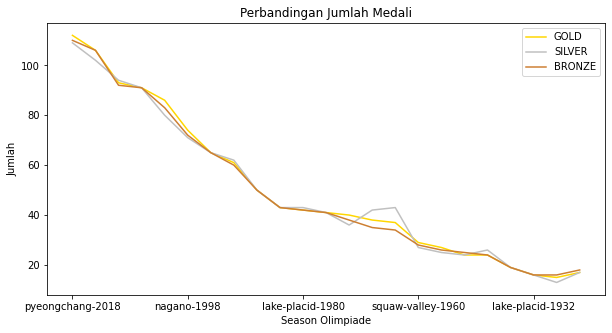

In [92]:
medali_gab_winter.plot(kind='line', x='index', y=['GOLD', 'SILVER', 'BRONZE'], 
                       color=['#FFD700','#C0C0C0','#CD7F32'], 
                       figsize = (10, 5))

plt.title('Perbandingan Jumlah Medali')
plt.xlabel('Season Olimpiade')
plt.ylabel('Jumlah')
plt.show()

Dari data di atas bahwa hampir setiap tahun jumlah medali meningkat. Lalu terdapat perbandingan seluruh olimpiade pada musim dingin dengan jumlah medali gold, silver, dan bronze yang berbeda. Olimpiade pada musim dingin yang paling banyak jumlah medali yaitu di Pyeongchang pada tahun 2018. Pada Olimpiade Pyeongchang 2018 terdapat 112 gold, 109 silver, dan 110 bronze. Sedangkan Olimpiade yang mendapatkan jumlah paling sedikit yaitu St Moritz pada tahun 1928 dengan jumlah 15 gold, 13 silver, dan 16 bronze.

### Perbandingan jumlah medali gold antara musim panas dan musim dingin

Berikut analisa perbandingan jumlah medali gold menggunakan line chart.

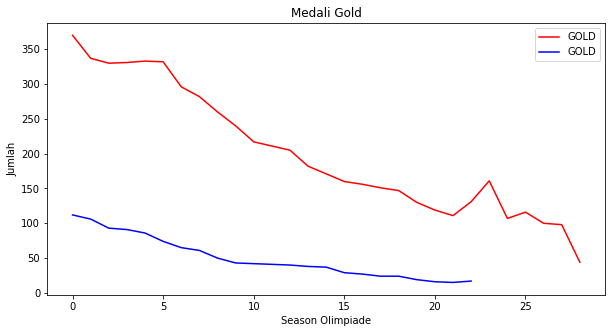

In [93]:
ax = plt.gca()

medali_gab_summer.plot(kind='line', y='GOLD', color='red', ax=ax, figsize = (10, 5))
medali_gab_winter.plot(kind='line', y='GOLD', color='blue', ax=ax)

plt.title('Medali Gold')
plt.xlabel('Season Olimpiade')
plt.ylabel('Jumlah')
plt.show()

Dari data di atas terlihat bahwa jumlah medali gold dan season olimpiade lebih banyak di musim panas dibandingkan di musim dingin.

### Perbandingan jumlah medali silver antara musim panas dan musim dingin

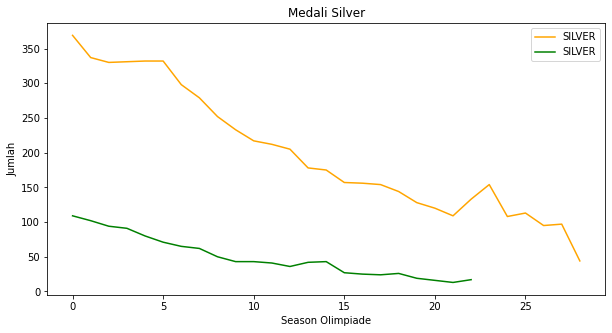

In [94]:
ax = plt.gca()

medali_gab_summer.plot(kind='line', y='SILVER', color='orange', ax=ax, figsize = (10, 5))
medali_gab_winter.plot(kind='line', y='SILVER', color='green', ax=ax)

plt.title('Medali Silver')
plt.xlabel('Season Olimpiade')
plt.ylabel('Jumlah')
plt.show()

Dari data di atas terlihat bahwa jumlah medali silver dan season olimpiade lebih banyak di musim panas dibandingkan di musim dingin.

### Perbandingan jumlah medali bronze antara musim panas dan musim dingin

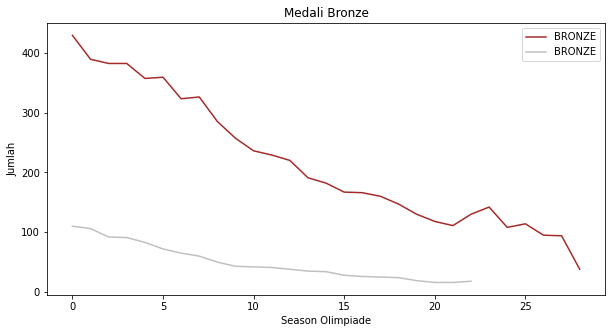

In [95]:
ax = plt.gca()

medali_gab_summer.plot(kind='line', y='BRONZE', color='BROWN', ax=ax, figsize = (10, 5))
medali_gab_winter.plot(kind='line', y='BRONZE', color='SILVER', ax=ax)

plt.title('Medali Bronze')
plt.xlabel('Season Olimpiade')
plt.ylabel('Jumlah')
plt.show()

Dari data di atas terlihat bahwa jumlah medali bronze dan season olimpiade lebih banyak di musim panas dibandingkan di musim dingin.

Dari data di atas terlihat bahwa jumlah medali gold, silver, dan bronze pada Olimpiade musim panas lebih banyak dibandingkan di musim dingin. Hal ini karena pada musim panas sudah diadakan dari tahun 1896 sehingga memiliki jumlah medali yang banyak sedangkan pada musim dingin dimulai pada tahun 1924 sehingga memiliki jumlah medali yang lebih sedikit.

### Rata-rata Umur Athletes per Cabang Olahraga

Berikut akan mencari rata-rata umur dalam cabang olahraga.

In [96]:
game_pertama = olympic_athletes.first_game.str.split('\s+').str[-1].to_frame('tahun')
game_pertama1 = game_pertama.tahun.fillna('0', inplace=True)
game_pertama2 = game_pertama.tahun.astype(int).to_frame('tahun')
game_pertama2

tahun
0       2020
1       2020
2       2020
3       2020
4       2016
...      ...
74726   1976
74727   1976
74728   1976
74729   1976
74730   1976

[74731 rows x 1 columns]

In [97]:
umur_atlet = (game_pertama2.tahun - olympic_athletes.athlete_year_birth).to_frame('umur')
umur_atlet1 = umur_atlet.umur.fillna(0, inplace=True)
umur_atlet1 = umur_atlet.umur.astype(int).to_frame('umur')
umur_atlet1[umur_atlet1 < 0] = 0
umur_atlet1

umur
0        32
1        27
2        23
3        26
4        20
...     ...
74726    21
74727    19
74728    19
74729    22
74730    16

[74731 rows x 1 columns]

In [98]:
nama_athlete = olympic_athletes.athlete_full_name
data_athlete = pd.merge(nama_athlete, umur_atlet1, left_index= True, right_index = True)
data_athlete = data_athlete[data_athlete.umur != 0]
data_athlete

athlete_full_name  umur
0           Dongqi CHEN    32
1       Sagen MADDALENA    27
2       Maria MARTYNOVA    23
3        Yulia KARIMOVA    26
4       Najmeh KHEDMATI    20
...                 ...   ...
74726    Douglas WEIGLE    21
74727  Stefania BERTELE    19
74728    Walter CECCONI    19
74729      Susan KELLEY    22
74730  Andrew STROUKOFF    16

[72150 rows x 2 columns]

In [99]:
nama_athlete1 = olympic_results.athlete_full_name
cabang_olahraga = olympic_results.discipline_title
data_athlete1 = pd.merge(nama_athlete1, cabang_olahraga, left_index= True, right_index = True)
data_athlete1

athlete_full_name discipline_title
0                Fatima GALVEZ         Shooting
1            Alberto FERNANDEZ         Shooting
2           Alessandra PERILLI         Shooting
3             Gian Marco BERTI         Shooting
4          Madelynn Ann BERNAU         Shooting
...                        ...              ...
21305             Viggo JENSEN    Weightlifting
21306  Alexandros Nikolopoulos    Weightlifting
21307             Viggo JENSEN    Weightlifting
21308        Launceston ELLIOT    Weightlifting
21309          Sotirios VERSIS    Weightlifting

[21310 rows x 2 columns]

In [100]:
data_athlete2 = pd.merge(data_athlete, data_athlete1, how='inner', on='athlete_full_name')
data_athlete2

athlete_full_name  umur     discipline_title
0               Yulia KARIMOVA    26             Shooting
1                Nina CHRISTEN    22             Shooting
2                Nina CHRISTEN    22             Shooting
3         Mary Carolynn TUCKER    19             Shooting
4                   Eglys CRUZ    24             Shooting
...                        ...   ...                  ...
16677  Clarence Olivier GAMBLE    23               Tennis
16678       Arthur Yancey WEAR    24               Tennis
16679       Dimitrios LOUNDRAS    11  Gymnastics Artistic
16680       Lyudmila PAKHOMOVA    30       Figure skating
16681         Colleen O'CONNOR    25       Figure skating

[16682 rows x 3 columns]

In [101]:
data_athlete3 = data_athlete2.groupby('discipline_title').mean().sort_values('umur', ascending=False).head()
data_athlete3

umur
discipline_title              
Roque                37.750000
Equestrian Dressage  33.492308
Equestrian Eventing  30.954545
Equestrian Jumping   30.260870
Jeu de Paume         30.000000

data di atas adalah rata-rata umur tertua pada cabang olahraga. Cabang olahraga roque merupakan cabang olahraga dengan rata-rata atlet tertua dengan rata-rata umur 37.75.

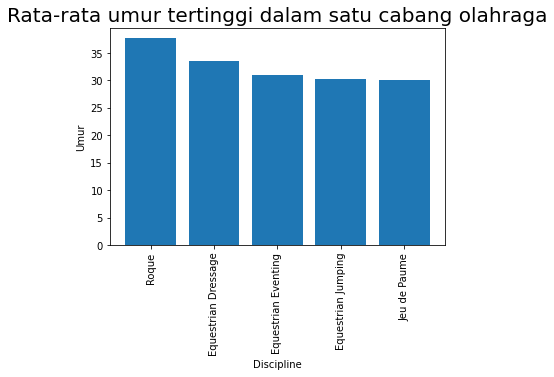

In [102]:
plt.bar(data_athlete3.index.values, data_athlete3['umur'])
plt.title('Rata-rata umur tertinggi dalam satu cabang olahraga', fontsize=20)
plt.xlabel('Discipline')
plt.ylabel('Umur')
plt.xticks(rotation=90)
plt.show()

Visualisasi di atas merupakan visualisasi dari rata-rata umur tertua. Posisi pertama terdapat cabang olahraga roque dengan rata-rata 37.75. Posisi kedua yaitu equestrian dressage dengan rata-rata umur 33.5. Posisi ketiga yaitu equestrian eventing dengan rata-rata umur 31.

In [103]:
data_athlete4 = data_athlete2.groupby('discipline_title').mean().sort_values('umur', ascending=True).head()
data_athlete4

umur
discipline_title                    
Skateboarding              17.666667
Swimming                   19.005722
Gymnastics Rhythmic        19.062500
Diving                     19.794760
Short Track Speed Skating  19.934066

data di atas adalah rata-rata umur termuda pada cabang olahraga. Cabang olahraga skateboarding merupakan cabang olahraga dengan rata-rata atlet tertua dengan rata-rata umur 17.666667.

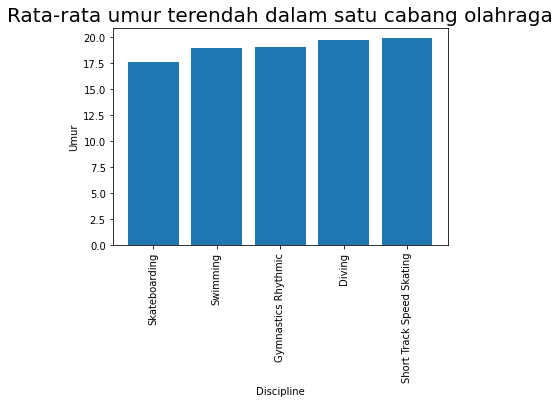

In [104]:
plt.bar(data_athlete4.index.values, data_athlete4['umur'])
plt.title('Rata-rata umur terendah dalam satu cabang olahraga', fontsize=20)
plt.xlabel('Discipline')
plt.ylabel('Umur')
plt.xticks(rotation=90)
plt.show()

Visualisasi di atas merupakan visualisasi dari rata-rata umur termuda. Posisi pertama terdapat cabang olahraga skateboarding dengan rata-rata 17.7. Posisi kedua yaitu swimming dengan rata-rata umur 19. Posisi ketiga yaitu gymnastics rhythmic dengan rata-rata umur 19.1.

### Analisis the GOAT berdasarkan medali di cabang olahraga yang selalu ada

Berikut akan mencari atlet yang mendapat medali gold paling banyak dalam cabang olahraga yang ada di setiap tahunnya.

In [105]:
tahun_game = olympic_results.slug_game.str.split('-').str[-1].to_frame('tahun')
tahun_game

tahun
0      2020
1      2020
2      2020
3      2020
4      2020
...     ...
21305  1896
21306  1896
21307  1896
21308  1896
21309  1896

[21310 rows x 1 columns]

In [106]:
game = olympic_results.discipline_title
info_cabor = pd.merge(game, tahun_game, left_index= True, right_index = True)
info_cabor

discipline_title tahun
0             Shooting  2020
1             Shooting  2020
2             Shooting  2020
3             Shooting  2020
4             Shooting  2020
...                ...   ...
21305    Weightlifting  1896
21306    Weightlifting  1896
21307    Weightlifting  1896
21308    Weightlifting  1896
21309    Weightlifting  1896

[21310 rows x 2 columns]

### Musim Panas
Pada eksplorasi kali ini adalah mencari the GOAT pada Olimpiade musim panas.

In [107]:
_2020 = info_cabor[info_cabor['tahun'] == '2020']
cabor_2020 = set(_2020['discipline_title'])
cabor_2020

{'3x3 Basketball',
 'Archery',
 'Artistic Gymnastics',
 'Artistic Swimming',
 'Athletics',
 'Badminton',
 'Baseball/Softball',
 'Basketball',
 'Beach Volleyball',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cycling BMX Freestyle',
 'Cycling BMX Racing',
 'Cycling Mountain Bike',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian',
 'Fencing',
 'Football',
 'Golf',
 'Handball',
 'Hockey',
 'Judo',
 'Karate',
 'Marathon Swimming',
 'Modern Pentathlon',
 'Rhythmic Gymnastics',
 'Rowing',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Skateboarding',
 'Sport Climbing',
 'Surfing',
 'Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampoline Gymnastics',
 'Triathlon',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [108]:
_2016 = info_cabor[info_cabor['tahun'] == '2016']
cabor_2016 = set(_2016['discipline_title'])
cabor_2016

{'Archery',
 'Athletics',
 'Badminton',
 'Basketball',
 'Beach Volleyball',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cycling BMX',
 'Cycling Mountain Bike',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Football',
 'Golf',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Judo',
 'Marathon Swimming',
 'Modern Pentathlon',
 'Rowing',
 'Rugby',
 'Sailing',
 'Shooting',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampoline',
 'Triathlon',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [109]:
_2012 = info_cabor[info_cabor['tahun'] == '2012']
cabor_2012 = set(_2012['discipline_title'])
cabor_2012

{'Archery',
 'Athletics',
 'Badminton',
 'Basketball',
 'Beach Volleyball',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cycling BMX',
 'Cycling Mountain Bike',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Judo',
 'Marathon Swimming',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampoline',
 'Triathlon',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [110]:
_2008 = info_cabor[info_cabor['tahun'] == '2008']
cabor_2008 = set(_2008['discipline_title'])
cabor_2008

{'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Beach Volleyball',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cycling BMX',
 'Cycling Mountain Bike',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Judo',
 'Marathon Swimming',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampoline',
 'Triathlon',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [111]:
_2004 = info_cabor[info_cabor['tahun'] == '2004']
cabor_2004 = set(_2004['discipline_title'])
cabor_2004

{'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Beach Volleyball',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cycling Mountain Bike',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Judo',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampoline',
 'Triathlon',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [112]:
_2000 = info_cabor[info_cabor['tahun'] == '2000']
cabor_2000 = set(_2000['discipline_title'])
cabor_2000

{'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Beach Volleyball',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cycling Mountain Bike',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Judo',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampoline',
 'Triathlon',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [113]:
_1996 = info_cabor[info_cabor['tahun'] == '1996']
cabor_1996 = set(_1996['discipline_title'])
cabor_1996

{'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Beach Volleyball',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cycling Mountain Bike',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Judo',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Tennis',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [114]:
_1992 = info_cabor[info_cabor['tahun'] == '1992']
cabor_1992 = set(_1992['discipline_title'])
cabor_1992

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Freestyle Skiing',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Short Track Speed Skating',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Tennis',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [115]:
_1988 = info_cabor[info_cabor['tahun'] == '1988']
cabor_1988 = set(_1988['discipline_title'])
cabor_1988

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Tennis',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [116]:
_1984 = info_cabor[info_cabor['tahun'] == '1984']
cabor_1984 = set(_1984['discipline_title'])
cabor_1984

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Synchronized Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [117]:
_1980 = info_cabor[info_cabor['tahun'] == '1980']
cabor_1980 = set(_1980['discipline_title'])
cabor_1980

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [118]:
_1976 = info_cabor[info_cabor['tahun'] == '1976']
cabor_1976 = set(_1976['discipline_title'])
cabor_1976

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [119]:
_1972 = info_cabor[info_cabor['tahun'] == '1972']
cabor_1972 = set(_1972['discipline_title'])
cabor_1972

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [120]:
_1968 = info_cabor[info_cabor['tahun'] == '1968']
cabor_1968 = set(_1968['discipline_title'])
cabor_1968

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [121]:
_1964 = info_cabor[info_cabor['tahun'] == '1964']
cabor_1964 = set(_1964['discipline_title'])
cabor_1964

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [122]:
_1960 = info_cabor[info_cabor['tahun'] == '1960']
cabor_1960 = set(_1960['discipline_title'])
cabor_1960

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [123]:
_1956 = info_cabor[info_cabor['tahun'] == '1956']
cabor_1956 = set(_1956['discipline_title'])
cabor_1956

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Bobsleigh',
 'Boxing',
 'Canoe Marathon',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [124]:
_1952 = info_cabor[info_cabor['tahun'] == '1952']
cabor_1952 = set(_1952['discipline_title'])
cabor_1952

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [125]:
_1948 = info_cabor[info_cabor['tahun'] == '1948']
cabor_1948 = set(_1948['discipline_title'])
cabor_1948

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Bobsleigh',
 'Boxing',
 'Canoe Marathon',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Skeleton',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [126]:
_1936 = info_cabor[info_cabor['tahun'] == '1936']
cabor_1936 = set(_1936['discipline_title'])
cabor_1936

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Polo',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [127]:
_1932 = info_cabor[info_cabor['tahun'] == '1932']
cabor_1932 = set(_1932['discipline_title'])
cabor_1932

{'Athletics',
 'Bobsleigh',
 'Boxing',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [128]:
_1928 = info_cabor[info_cabor['tahun'] == '1928']
cabor_1928 = set(_1928['discipline_title'])
cabor_1928

{'Athletics',
 'Bobsleigh',
 'Boxing',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Skeleton',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [129]:
_1924 = info_cabor[info_cabor['tahun'] == '1924']
cabor_1924 = set(_1924['discipline_title'])
cabor_1924

{'Athletics',
 'Bobsleigh',
 'Boxing',
 'Cross Country Skiing',
 'Curling',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Ice Hockey',
 'Military Patrol',
 'Modern Pentathlon',
 'Nordic Combined',
 'Polo',
 'Rowing',
 'Rugby',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Tennis',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [130]:
_1920 = info_cabor[info_cabor['tahun'] == '1920']
cabor_1920 = set(_1920['discipline_title'])
cabor_1920

{'Archery',
 'Athletics',
 'Boxing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian  Vaulting',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Polo',
 'Rowing',
 'Rugby',
 'Sailing',
 'Shooting',
 'Swimming',
 'Tennis',
 'Tug of War',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [131]:
_1912 = info_cabor[info_cabor['tahun'] == '1912']
cabor_1912 = set(_1912['discipline_title'])
cabor_1912

{'Athletics',
 'Cycling Road',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Football',
 'Gymnastics Artistic',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Swimming',
 'Tennis',
 'Tug of War',
 'Water Polo',
 'Wrestling'}

In [132]:
_1908 = info_cabor[info_cabor['tahun'] == '1908']
cabor_1908 = set(_1908['discipline_title'])
cabor_1908

{'Archery',
 'Athletics',
 'Boxing',
 'Cycling Track',
 'Diving',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Jeu de Paume',
 'Lacrosse',
 'Polo',
 'Rackets',
 'Rowing',
 'Rugby',
 'Sailing',
 'Shooting',
 'Swimming',
 'Tennis',
 'Tug of War',
 'Water Motorsports',
 'Water Polo',
 'Wrestling'}

In [133]:
_1904 = info_cabor[info_cabor['tahun'] == '1904']
cabor_1904 = set(_1904['discipline_title'])
cabor_1904

{'Archery',
 'Athletics',
 'Boxing',
 'Cycling Track',
 'Diving',
 'Fencing',
 'Football',
 'Golf',
 'Gymnastics Artistic',
 'Lacrosse',
 'Roque',
 'Rowing',
 'Swimming',
 'Tennis',
 'Tug of War',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [134]:
_1900 = info_cabor[info_cabor['tahun'] == '1900']
cabor_1900 = set(_1900['discipline_title'])
cabor_1900

{'Archery',
 'Athletics',
 'Basque Pelota',
 'Cricket',
 'Croquet',
 'Cycling Track',
 'Equestrian Jumping',
 'Fencing',
 'Football',
 'Golf',
 'Gymnastics Artistic',
 'Polo',
 'Rowing',
 'Rugby',
 'Sailing',
 'Shooting',
 'Swimming',
 'Tennis',
 'Tug of War',
 'Water Polo'}

In [135]:
_1896 = info_cabor[info_cabor['tahun'] == '1896']
cabor_1896 = set(_1896['discipline_title'])
cabor_1896

{'Athletics',
 'Cycling Road',
 'Cycling Track',
 'Fencing',
 'Gymnastics Artistic',
 'Shooting',
 'Swimming',
 'Tennis',
 'Weightlifting',
 'Wrestling'}

In [136]:
semua_cabor_summer = cabor_2020.intersection(cabor_2016, cabor_2012, cabor_2008, 
                                             cabor_2004, cabor_2000, cabor_1996, cabor_1992, 
                                             cabor_1988, cabor_1984, cabor_1980, cabor_1976, 
                                             cabor_1972, cabor_1968, cabor_1964, cabor_1960, 
                                             cabor_1956, cabor_1952, cabor_1948, cabor_1936, 
                                             cabor_1932, cabor_1928, cabor_1924, cabor_1920, 
                                             cabor_1912, cabor_1908, cabor_1904, cabor_1900, 
                                             cabor_1896)
semua_cabor_summer

{'Athletics', 'Fencing', 'Swimming'}

Data di atas merupakan operasi intersection untuk mendapatkan cabang olahraga yang selalu ada dari tahun 1896 sampai tahun 2020. Dari operasi tersebut menghasilkan tiga cabang olahraga yaitu athletics, fencing, dan swimming.

In [137]:
atlet_nama = olympic_medals.athlete_full_name
nama_cabor = olympic_medals.discipline_title
olimpiade_medali = pd.merge(atlet_nama, nama_cabor, left_index= True, right_index = True)
olimpiade_medali

athlete_full_name discipline_title
0                Fatima GALVEZ         Shooting
1            Alberto FERNANDEZ         Shooting
2           Alessandra PERILLI         Shooting
3             Gian Marco BERTI         Shooting
4          Madelynn Ann BERNAU         Shooting
...                        ...              ...
21305             Viggo JENSEN    Weightlifting
21306  Alexandros Nikolopoulos    Weightlifting
21307             Viggo JENSEN    Weightlifting
21308        Launceston ELLIOT    Weightlifting
21309          Sotirios VERSIS    Weightlifting

[21310 rows x 2 columns]

In [138]:
tipe_medal = olympic_medals.medal_type
olimpiade_medali1 = pd.merge(olimpiade_medali, tipe_medal, left_index= True, right_index = True)
olimpiade_medali1

athlete_full_name discipline_title medal_type
0                Fatima GALVEZ         Shooting       GOLD
1            Alberto FERNANDEZ         Shooting       GOLD
2           Alessandra PERILLI         Shooting     SILVER
3             Gian Marco BERTI         Shooting     SILVER
4          Madelynn Ann BERNAU         Shooting     BRONZE
...                        ...              ...        ...
21305             Viggo JENSEN    Weightlifting     SILVER
21306  Alexandros Nikolopoulos    Weightlifting     BRONZE
21307             Viggo JENSEN    Weightlifting       GOLD
21308        Launceston ELLIOT    Weightlifting     SILVER
21309          Sotirios VERSIS    Weightlifting     BRONZE

[21310 rows x 3 columns]

In [139]:
info_atlet_medali_summer = olimpiade_medali1.loc[(olimpiade_medali1['discipline_title'] == 'Athletics') & 
                                                 (olimpiade_medali1['medal_type'] == 'GOLD')]
cabor_summer = info_atlet_medali_summer.value_counts().reset_index(name='Jumlah')
cabor_summer.head()

athlete_full_name discipline_title medal_type  Jumlah
0          Ray EWRY        Athletics       GOLD       8
1        Carl LEWIS        Athletics       GOLD       7
2       Paavo NURMI        Athletics       GOLD       6
3        Usain BOLT        Athletics       GOLD       6
4  Alvin KRAENZLEIN        Athletics       GOLD       4

Data di atas merupakan informasi data the GOAT pada cabang olahraga athletics. Atlet yang memiliki julukan the GOAT adalah Ray Ewry dengan mendapatkan 8 gold.

In [140]:
info_atlet_medali_summer1 = olimpiade_medali1.loc[(olimpiade_medali1['discipline_title'] == 'Fencing') & 
                                                  (olimpiade_medali1['medal_type'] == 'GOLD')]
cabor_summer1 = info_atlet_medali_summer1.value_counts().reset_index(name='Jumlah')
cabor_summer1.head()

athlete_full_name discipline_title medal_type  Jumlah
0                Nedo NADI          Fencing       GOLD       3
1            Aron SZILAGYI          Fencing       GOLD       3
2  Maria Valentina VEZZALI          Fencing       GOLD       3
3              Ramon FONST          Fencing       GOLD       3
4               Ilona ELEK          Fencing       GOLD       2

Data di atas merupakan informasi data the GOAT pada cabang olahraga fencing. Atlet yang memiliki julukan the GOAT adalah Nedo Nadi, Aron Szilagyi, Maria Valentina Vezzali, dan Ramon Fonst dengan mendapatkan 3 gold.

In [141]:
info_atlet_medali_summer2 = olimpiade_medali1.loc[(olimpiade_medali1['discipline_title'] == 'Swimming') & 
                                                  (olimpiade_medali1['medal_type'] == 'GOLD')]
cabor_summer2 = info_atlet_medali_summer2.value_counts().reset_index(name='Jumlah')
cabor_summer2.head()

athlete_full_name discipline_title medal_type  Jumlah
0       Michael PHELPS         Swimming       GOLD      13
1        Katie LEDECKY         Swimming       GOLD       6
2  Krisztina EGERSZEGI         Swimming       GOLD       5
3       Yana KLOCHKOVA         Swimming       GOLD       4
4         Tamas DARNYI         Swimming       GOLD       4

Data di atas merupakan informasi data the GOAT pada cabang olahraga swimming. Atlet yang memiliki julukan the GOAT adalah Michael Phelps dengan mendapatkan 13 gold.

### Musim Dingin
Pada eksplorasi kali ini adalah mencari the GOAT pada Olimpiade musim dingin.

In [142]:
_2018 = info_cabor[info_cabor['tahun'] == '2018']
cabor_2018 = set(_2018['discipline_title'])
cabor_2018

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Curling',
 'Figure skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track',
 'Skeleton',
 'Ski Jumping',
 'Snowboard',
 'Speed skating'}

In [143]:
_2014 = info_cabor[info_cabor['tahun'] == '2014']
cabor_2014 = set(_2014['discipline_title'])
cabor_2014

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Curling',
 'Figure skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboard',
 'Speed skating'}

In [144]:
_2010 = info_cabor[info_cabor['tahun'] == '2010']
cabor_2010 = set(_2010['discipline_title'])
cabor_2010

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Curling',
 'Figure skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboard',
 'Speed skating'}

In [145]:
_2006 = info_cabor[info_cabor['tahun'] == '2006']
cabor_2006 = set(_2006['discipline_title'])
cabor_2006

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Curling',
 'Figure skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboard',
 'Speed skating'}

In [146]:
_2002 = info_cabor[info_cabor['tahun'] == '2002']
cabor_2002 = set(_2002['discipline_title'])
cabor_2002

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Curling',
 'Figure skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboard',
 'Speed skating'}

In [147]:
_1998 = info_cabor[info_cabor['tahun'] == '1998']
cabor_1998 = set(_1998['discipline_title'])
cabor_1998

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Curling',
 'Figure skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track Speed Skating',
 'Ski Jumping',
 'Snowboard',
 'Speed skating'}

In [148]:
_1994 = info_cabor[info_cabor['tahun'] == '1994']
cabor_1994 = set(_1994['discipline_title'])
cabor_1994

{'Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross Country Skiing',
 'Figure skating',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track Speed Skating',
 'Ski Jumping',
 'Speed skating'}

In [149]:
_1992 = info_cabor[info_cabor['tahun'] == '1992']
cabor_1992 = set(_1992['discipline_title'])
cabor_1992

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Freestyle Skiing',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Short Track Speed Skating',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Tennis',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [150]:
_1988 = info_cabor[info_cabor['tahun'] == '1988']
cabor_1988 = set(_1988['discipline_title'])
cabor_1988

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Tennis',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [151]:
_1984 = info_cabor[info_cabor['tahun'] == '1984']
cabor_1984 = set(_1984['discipline_title'])
cabor_1984

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Gymnastics Rhythmic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Synchronized Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [152]:
_1980 = info_cabor[info_cabor['tahun'] == '1980']
cabor_1980 = set(_1980['discipline_title'])
cabor_1980

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [153]:
_1976 = info_cabor[info_cabor['tahun'] == '1976']
cabor_1976 = set(_1976['discipline_title'])
cabor_1976

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [154]:
_1972 = info_cabor[info_cabor['tahun'] == '1972']
cabor_1972 = set(_1972['discipline_title'])
cabor_1972

{'Alpine Skiing',
 'Archery',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Slalom',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [155]:
_1968 = info_cabor[info_cabor['tahun'] == '1968']
cabor_1968 = set(_1968['discipline_title'])
cabor_1968

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [156]:
_1964 = info_cabor[info_cabor['tahun'] == '1964']
cabor_1964 = set(_1964['discipline_title'])
cabor_1964

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Luge',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [157]:
_1960 = info_cabor[info_cabor['tahun'] == '1960']
cabor_1960 = set(_1960['discipline_title'])
cabor_1960

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Biathlon',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [158]:
_1956 = info_cabor[info_cabor['tahun'] == '1956']
cabor_1956 = set(_1956['discipline_title'])
cabor_1956

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Bobsleigh',
 'Boxing',
 'Canoe Marathon',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [159]:
_1952 = info_cabor[info_cabor['tahun'] == '1952']
cabor_1952 = set(_1952['discipline_title'])
cabor_1952

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [160]:
_1948 = info_cabor[info_cabor['tahun'] == '1948']
cabor_1948 = set(_1948['discipline_title'])
cabor_1948

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Bobsleigh',
 'Boxing',
 'Canoe Marathon',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Skeleton',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [161]:
_1936 = info_cabor[info_cabor['tahun'] == '1936']
cabor_1936 = set(_1936['discipline_title'])
cabor_1936

{'Alpine Skiing',
 'Athletics',
 'Basketball',
 'Bobsleigh',
 'Boxing',
 'Canoe Sprint',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Polo',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [162]:
_1932 = info_cabor[info_cabor['tahun'] == '1932']
cabor_1932 = set(_1932['discipline_title'])
cabor_1932

{'Athletics',
 'Bobsleigh',
 'Boxing',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [163]:
_1928 = info_cabor[info_cabor['tahun'] == '1928']
cabor_1928 = set(_1928['discipline_title'])
cabor_1928

{'Athletics',
 'Bobsleigh',
 'Boxing',
 'Cross Country Skiing',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Hockey',
 'Ice Hockey',
 'Modern Pentathlon',
 'Nordic Combined',
 'Rowing',
 'Sailing',
 'Skeleton',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [164]:
_1924 = info_cabor[info_cabor['tahun'] == '1924']
cabor_1924 = set(_1924['discipline_title'])
cabor_1924

{'Athletics',
 'Bobsleigh',
 'Boxing',
 'Cross Country Skiing',
 'Curling',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Equestrian Dressage',
 'Equestrian Eventing',
 'Equestrian Jumping',
 'Fencing',
 'Figure skating',
 'Football',
 'Gymnastics Artistic',
 'Ice Hockey',
 'Military Patrol',
 'Modern Pentathlon',
 'Nordic Combined',
 'Polo',
 'Rowing',
 'Rugby',
 'Sailing',
 'Shooting',
 'Ski Jumping',
 'Speed skating',
 'Swimming',
 'Tennis',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [165]:
semua_cabor_winter = cabor_2018.intersection(cabor_2014, cabor_2010, cabor_2006, cabor_2002, 
                                             cabor_1998, cabor_1994, cabor_1992, cabor_1988, 
                                             cabor_1984, cabor_1980, cabor_1976, cabor_1972, 
                                             cabor_1968, cabor_1964, cabor_1960, cabor_1956, 
                                             cabor_1952, cabor_1948, cabor_1936, cabor_1932, 
                                             cabor_1928, cabor_1924)
semua_cabor_winter

{'Cross Country Skiing',
 'Figure skating',
 'Ice Hockey',
 'Nordic Combined',
 'Ski Jumping',
 'Speed skating'}

Data di atas merupakan operasi intersection untuk mendapatkan cabang olahraga yang selalu ada dari tahun 1924 sampai tahun 2018. Dari operasi tersebut menghasilkan enam cabang olahraga yaitu cross country skiing, figure skating, ice hockey, nordic combined, ski jumping, dan speed skating.

In [166]:
info_atlet_medali_winter = olimpiade_medali1.loc[(olimpiade_medali1['discipline_title'] == 'Cross Country Skiing') & 
                                                 (olimpiade_medali1['medal_type'] == 'GOLD')]
cabor_winter = info_atlet_medali_winter.value_counts().reset_index(name='Jumlah')
cabor_winter.head()

athlete_full_name      discipline_title medal_type  Jumlah
0    Marit BJOERGEN  Cross Country Skiing       GOLD       6
1     Björn DAEHLIE  Cross Country Skiing       GOLD       6
2     Dario COLOGNA  Cross Country Skiing       GOLD       4
3   Lyubov Yegorova  Cross Country Skiing       GOLD       4
4  Nikolay ZIMYATOV  Cross Country Skiing       GOLD       3

Data di atas merupakan informasi data the GOAT pada cabang olahraga cross country skiing. Atlet yang memiliki julukan the GOAT adalah Marit Bjoergen dan  Björn Daehlie dengan mendapatkan 6 gold.

In [167]:
info_atlet_medali_winter1 = olimpiade_medali1.loc[(olimpiade_medali1['discipline_title'] == 'Figure skating') & 
                                                  (olimpiade_medali1['medal_type'] == 'GOLD')]
cabor_winter1 = info_atlet_medali_winter1.value_counts().reset_index(name='Jumlah')
cabor_winter1.head()

athlete_full_name discipline_title medal_type  Jumlah
0  Gillis GRAFSTRÖM   Figure skating       GOLD       3
1     Irina RODNINA   Figure skating       GOLD       3
2       Sonja HENIE   Figure skating       GOLD       3
3   Artur DMITRIYEV   Figure skating       GOLD       2
4    Richard BUTTON   Figure skating       GOLD       2

Data di atas merupakan informasi data the GOAT pada cabang olahraga figure skating. Atlet yang memiliki julukan the GOAT adalah Gillis Grastrom, Irina Rodnina, dan Sonja Henie dengan mendapatkan 3 gold.

In [168]:
info_atlet_medali_winter3 = olimpiade_medali1.loc[(olimpiade_medali1['discipline_title'] == 'Nordic Combined') & 
                                                  (olimpiade_medali1['medal_type'] == 'GOLD')]
cabor_winter3 = info_atlet_medali_winter3.value_counts().reset_index(name='Jumlah')
cabor_winter3.head()

athlete_full_name discipline_title medal_type  Jumlah
0        Ulrich WEHLING  Nordic Combined       GOLD       3
1  Johan GRØTTUMSBRÅTEN  Nordic Combined       GOLD       2
2        Samppa LAJUNEN  Nordic Combined       GOLD       2
3          Eric FRENZEL  Nordic Combined       GOLD       2
4      Bjarte Engen VIK  Nordic Combined       GOLD       1

Data di atas merupakan informasi data the GOAT pada cabang olahraga nordic combined. Atlet yang memiliki julukan the GOAT adalah Ulrich Wehling dengan mendapatkan 3 gold.

In [169]:
info_atlet_medali_winter4 = olimpiade_medali1.loc[(olimpiade_medali1['discipline_title'] == 'Ski Jumping') & 
                                                  (olimpiade_medali1['medal_type'] == 'GOLD')]
cabor_winter4 = info_atlet_medali_winter4.value_counts().reset_index(name='Jumlah')
cabor_winter4.head()

athlete_full_name discipline_title medal_type  Jumlah
0      Simon AMMANN      Ski Jumping       GOLD       4
1       Kamil STOCH      Ski Jumping       GOLD       3
2     Matti NYKANEN      Ski Jumping       GOLD       3
3    Jens WEISSFLOG      Ski Jumping       GOLD       2
4       Birger RUUD      Ski Jumping       GOLD       2

Data di atas merupakan informasi data the GOAT pada cabang olahraga ski jumping. Atlet yang memiliki julukan the GOAT adalah Simon Ammann dengan mendapatkan 4 gold.

In [170]:
info_atlet_medali_winter5 = olimpiade_medali1.loc[(olimpiade_medali1['discipline_title'] == 'Speed skating') & 
                                                  (olimpiade_medali1['medal_type'] == 'GOLD')]
cabor_winter5 = info_atlet_medali_winter5.value_counts().reset_index(name='Jumlah')
cabor_winter5.head()

athlete_full_name discipline_title medal_type  Jumlah
0  Lidiya SKOBLIKOVA    Speed skating       GOLD       6
1        Eric HEIDEN    Speed skating       GOLD       5
2       Bonnie BLAIR    Speed skating       GOLD       5
3      Clas THUNBERG    Speed skating       GOLD       5
4  Claudia PECHSTEIN    Speed skating       GOLD       4

Data di atas merupakan informasi data the GOAT pada cabang olahraga speed sakting. Atlet yang memiliki julukan the GOAT adalah Lidiya Skoblikova dengan mendapatkan 6 gold.

### Korelasi jumlah pelatih dan jumlah medali di Olimpiade Tokyo 2021

Berikut akan mencari korelasi jumlah pelatih jumlah medali di Olimpiade Tokyo 2021.

In [171]:
data_jumlah_coach = coaches_df.groupby('NOC').size().to_frame('Jumlah').sort_values('Jumlah', ascending=False)
data_jumlah_coach

Jumlah
NOC                             
Japan                         35
United States of America      28
Spain                         28
Australia                     22
Canada                        16
...                          ...
Croatia                        1
Slovakia                       1
Honduras                       1
Liechtenstein                  1
Angola                         1

[61 rows x 1 columns]

In [172]:
data_NOC = medals_df['Team/NOC']
data_total = medals_df['Total']
data_jumlah_medali = pd.merge(data_NOC, data_total, left_index= True, right_index = True)
data_jumlah_medali.rename(columns = {'Team/NOC':'NOC'}, inplace = True)
data_jumlah_medali

NOC  Total
0     United States of America    113
1   People's Republic of China     88
2                        Japan     58
3                Great Britain     65
4                          ROC     71
..                         ...    ...
88                       Ghana      1
89                     Grenada      1
90                      Kuwait      1
91         Republic of Moldova      1
92        Syrian Arab Republic      1

[93 rows x 2 columns]

In [173]:
korelasi_c_m = pd.merge(data_jumlah_coach,data_jumlah_medali, how='inner', on='NOC')
korelasi_c_m

NOC  Jumlah  Total
0                        Japan      35     58
1     United States of America      28    113
2                        Spain      28     17
3                    Australia      22     46
4                       Canada      16     24
5                        Italy      14     40
6                          ROC      12     71
7                        Egypt      12      6
8                 South Africa      12      3
9   People's Republic of China      12     88
10                   Argentina      11      3
11                 Netherlands      10     36
12                      France      10     33
13                   Venezuela      10      4
14                     Germany       9     37
15                     Nigeria       9      2
16                 New Zealand       8     20
17                      Mexico       8      4
18                      Brazil       7     21
19           Republic of Korea       7     20
20               Great Britain       7     65
21                      Greece       6      4
22          Dominican Republic       6      5
23                       Kenya       5     10
24                      Serbia       5      9
25               Côte d'Ivoire       5      1
26                     Belgium       5      7
27                       India       5      7
28                     Hungary       4     20
29                     Ukraine       4     19
30                      Poland       3     14
31                     Austria       3      7
32                     Ireland       3      4
33                 Puerto Rico       3      1
34                    Slovenia       3      5
35                      Sweden       3      9
36                      Norway       3      8
37                     Romania       2      4
38                  San Marino       2      3
39                Saudi Arabia       2      1
40                     Denmark       2     11
41                  Kazakhstan       2      8
42                      Israel       2      4
43    Islamic Republic of Iran       2      7
44                        Fiji       2      2
45              Czech Republic       2     11
46                    Colombia       2      5
47                     Tunisia       1      2
48                     Bahrain       1      1
49                     Belarus       1      7
50                      Turkey       1     13
51                    Portugal       1      4
52                     Croatia       1      8
53                    Slovakia       1      4

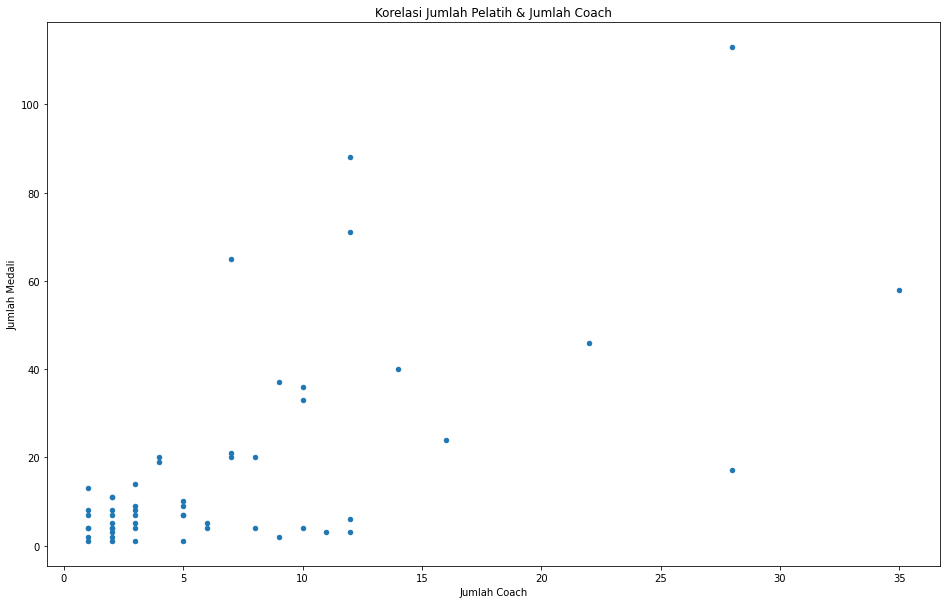

In [174]:
korelasi_c_m.plot.scatter(x='Jumlah',
                              y='Total', 
                              figsize=(16,10))
plt.xlabel('Jumlah Coach')
plt.ylabel('Jumlah Medali')
plt.title('Korelasi Jumlah Pelatih & Jumlah Coach')

plt.show()

Visualisasi di atas merupakan visualisasi scatter plot korelasi jumlah pelatih dan jumlah medali. Dari visualisasi tersebut terlihat jumlah pelatih tidak mempengaruhi jumlah medali.